<a href="https://colab.research.google.com/github/janasamra/Customer-Segmentation/blob/main/Customer_Segmentation_Final_Version_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries that we will need
import pandas as pd
import numpy as np
import matplotlib as mlp
import seaborn as sns
import scipy.cluster.hierarchy as sch
import warnings
from matplotlib import pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
plt.rcParams['figure.figsize'] = [15, 8]
warnings.filterwarnings('ignore')

# - Data Exploration

In [ ]:
df=pd.read_csv(r"C:\Users\janas\Downloads\marketing_campaign.csv",sep="\t")

In [ ]:
df.head(20)

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0   5524        1957  Graduation         Single  58138.0        0         0   
1   2174        1954  Graduation         Single  46344.0        1         1   
2   4141        1965  Graduation       Together  71613.0        0         0   
3   6182        1984  Graduation       Together  26646.0        1         0   
4   5324        1981         PhD        Married  58293.0        1         0   
5   7446        1967      Master       Together  62513.0        0         1   
6    965        1971  Graduation       Divorced  55635.0        0         1   
7   6177        1985         PhD        Married  33454.0        1         0   
8   4855        1974         PhD       Together  30351.0        1         0   
9   5899        1950         PhD       Together   5648.0        1         1   
10  1994        1983  Graduation        Married      NaN        1         0   
11   387        1976       Basic        Married   7500.0        0         0   
12  2125        1959  Graduation       Divorced  63033.0        0         0   
13  8180        1952      Master       Divorced  59354.0        1         1   
14  2569        1987  Graduation        Married  17323.0        0         0   
15  2114        1946         PhD         Single  82800.0        0         0   
16  9736        1980  Graduation        Married  41850.0        1         1   
17  4939        1946  Graduation       Together  37760.0        0         0   
18  6565        1949      Master        Married  76995.0        0         1   
19  2278        1985    2n Cycle         Single  33812.0        1         0   

   Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0   04-09-2012       58       635  ...                  7             0   
1   08-03-2014       38        11  ...                  5             0   
2   21-08-2013       26       426  ...                  4             0   
3   10-02-2014       26        11  ...                  6             0   
4   19-01-2014       94       173  ...                  5             0   
5   09-09-2013       16       520  ...                  6             0   
6   13-11-2012       34       235  ...                  6             0   
7   08-05-2013       32        76  ...                  8             0   
8   06-06-2013       19        14  ...                  9             0   
9   13-03-2014       68        28  ...                 20             1   
10  15-11-2013       11         5  ...                  7             0   
11  13-11-2012       59         6  ...                  8             0   
12  15-11-2013       82       194  ...                  2             0   
13  15-11-2013       53       233  ...                  6             0   
14  10-10-2012       38         3  ...                  8             0   
15  24-11-2012       23      1006  ...                  3             0   
16  24-12-2012       51        53  ...                  8             0   
17  31-08-2012       20        84  ...                  7             0   
18  28-03-2013       91      1012  ...                  5             0   
19  03-11-2012       86         4  ...                  6             0   

    AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0              0             0             0             0         0   
1              0             0             0             0         0   
2              0             0             0             0         0   
3              0             0             0             0         0   
4              0             0             0             0         0   
5              0             0             0             0         0   
6              0             0             0             0         0   
7              0             0             0             0         0   
8              0             0             0             0         0   
9              0             0             0      

In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
for i in df.columns:
    print(i ,":",df[i].unique(),"\n",df[i].value_counts())

ID : [5524 2174 4141 ... 7270 8235 9405] 
 0       1
2831    1
1064    1
6798    1
3479    1
       ..
5376    1
4552    1
7419    1
5370    1
4094    1
Name: ID, Length: 2240, dtype: int64
Year_Birth : [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940] 
 1976    89
1971    87
1975    83
1972    79
1970    77
1978    77
1973    74
1965    74
1969    71
1974    69
1956    55
1979    53
1958    53
1977    52
1952    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1963    45
1982    45
1967    44
1962    44
1951    43
1957    43
1986    42
1983    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1949    30
1989    30
1988    29
1950    29
1987    27
1948    21
1990    18
1947    16
1946    16

<AxesSubplot:>

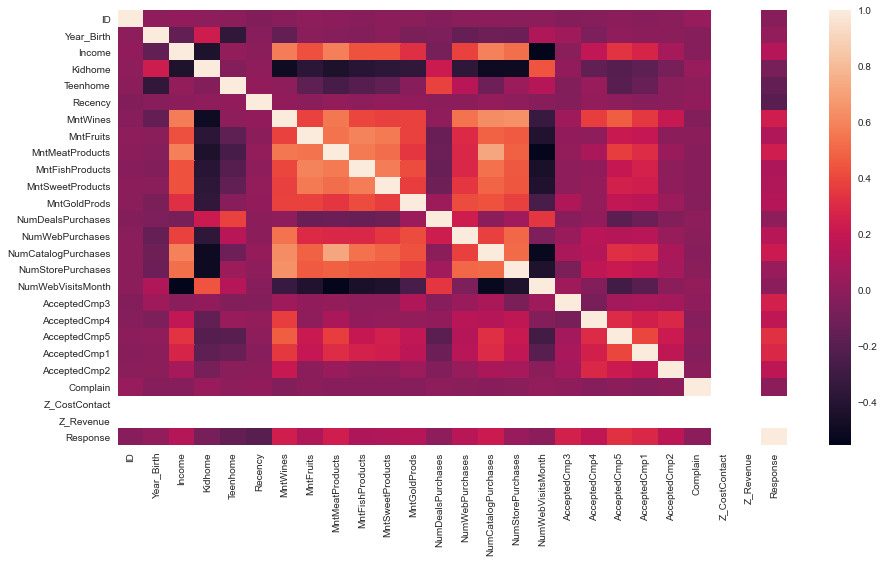

In [ ]:
sns.heatmap(df.corr())


# -Initial Data Preprocessing

In this section:

-Handling Duplicates.


-Handling Nulls.     


-Handling Outliers.






### -Handling Duplicates

In [ ]:
#Getting the data with no duplicates
dubli=df.drop_duplicates()

In [ ]:
#Checking the number of duplicates
num_of_dubli=df.shape[0]-dubli.shape[0]
num_of_dubli

0

### -Handling Outliers

In [ ]:
#Knowing the sum of the nulls in each feature
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [ ]:
#Checking that there is no zero value in income feature
df[df["Income"]==0]

Empty DataFrame
Columns: [ID, Year_Birth, Education, Marital_Status, Income, Kidhome, Teenhome, Dt_Customer, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response]
Index: []

[0 rows x 29 columns]

In [ ]:
#Filling nulls with zeros so that I could reach them
df["Income"]=df["Income"].fillna(0)

In [ ]:
#Checking the way that i'm gonna fill the nulls with
df[(df["Education"]=="Graduation") & (df["Marital_Status"]=="Married")].describe()["Income"]["mean"]

50330.97228637413

In [ ]:
#filling nulls using the mean of the eduction values and marital status value together
counter=0
for i in df["Income"]:
    if i==0:
        var1=df.iat[counter,2]
        var2=df.iat[counter,3]
        df.iat[counter,4]=df[(df["Education"]==var1) & (df["Marital_Status"]==var2)].describe()["Income"]["mean"]
    counter=counter+1

In [ ]:
#Checking that there is no nulls
df["Income"].isnull().sum()

0

### - Handling Outliers

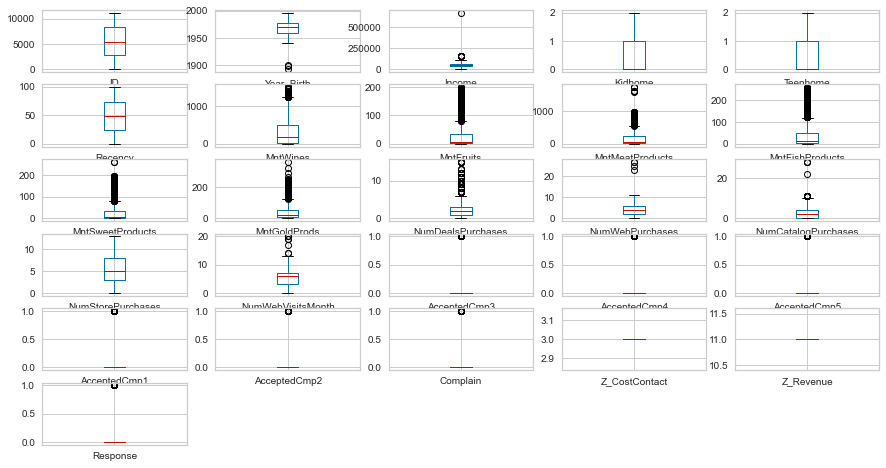

In [ ]:
#boxploting each feature
df.plot(kind="box",subplots=True,layout=(6,5))
plt.show()

<AxesSubplot:xlabel='Income'>

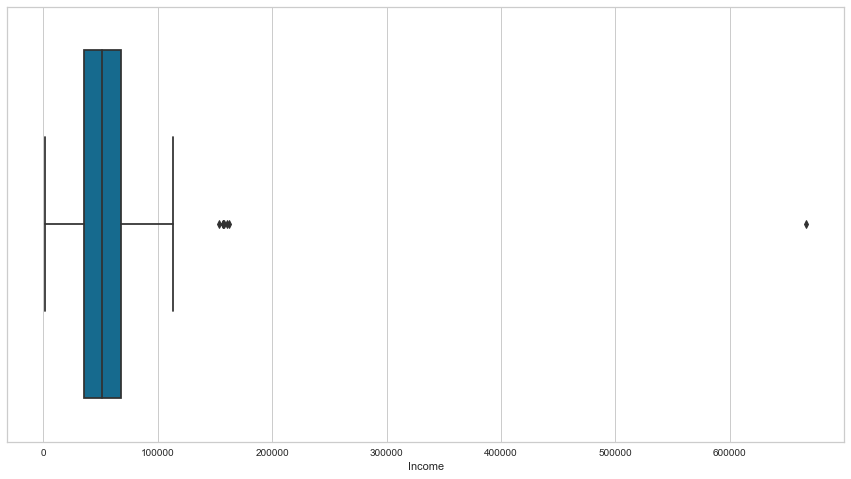

In [ ]:
#Boxploting Income feature
sns.boxplot(x=df["Income"])

<AxesSubplot:xlabel='Income'>

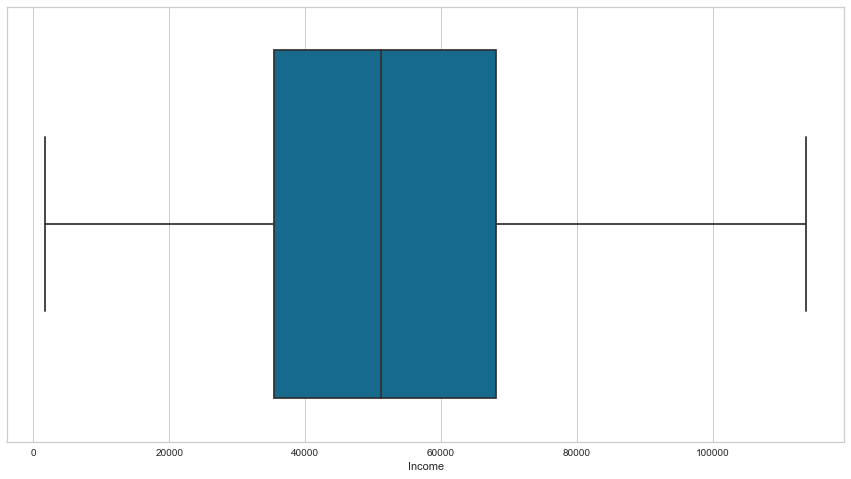

In [ ]:
#Handling the outliers by removing them
df=df[df["Income"]<120000]
sns.boxplot(x=df["Income"])

<AxesSubplot:xlabel='Year_Birth'>

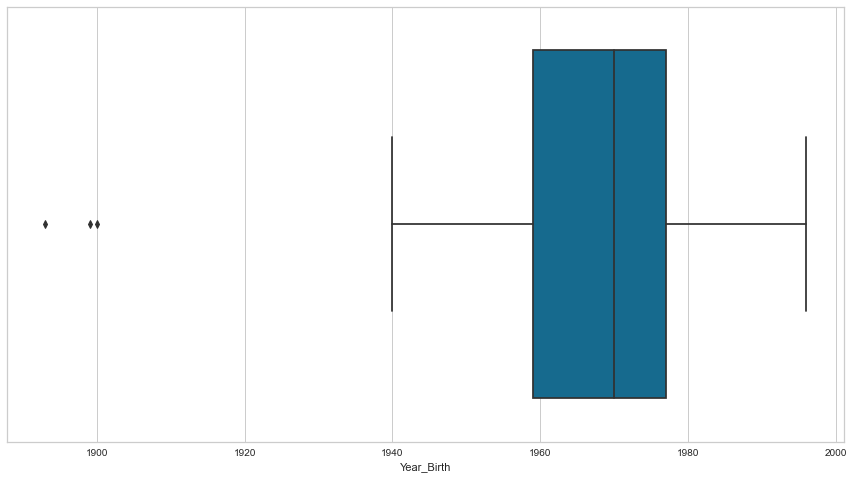

In [ ]:
#Boxploting Year_Birth feature
sns.boxplot(x=df["Year_Birth"])

<AxesSubplot:xlabel='Year_Birth'>

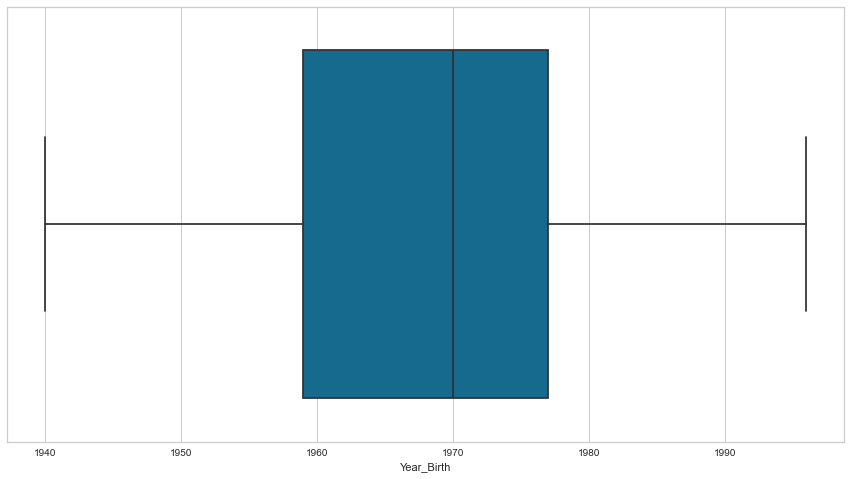

In [ ]:
#Handling the outliers by removing them
df=df[df["Year_Birth"]>=1940]
sns.boxplot(x=df["Year_Birth"])

<AxesSubplot:xlabel='MntWines'>

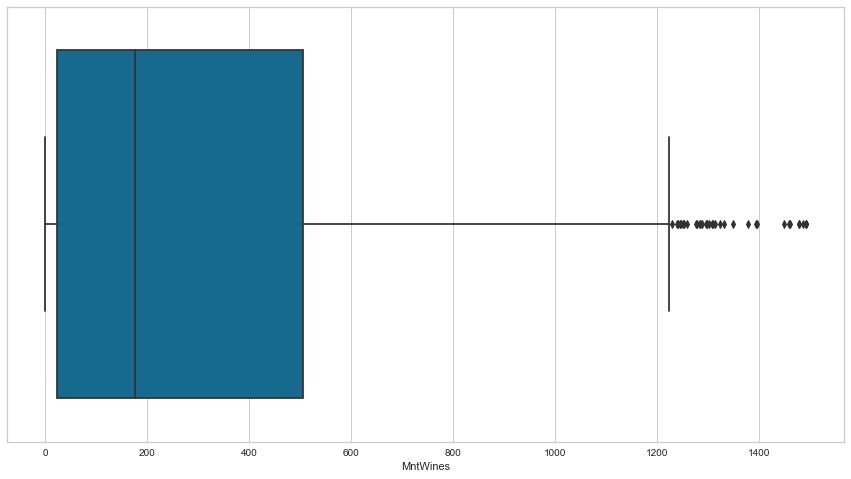

In [ ]:
#Boxploting MntWines feature
sns.boxplot(x=df["MntWines"])

<AxesSubplot:xlabel='MntWines'>

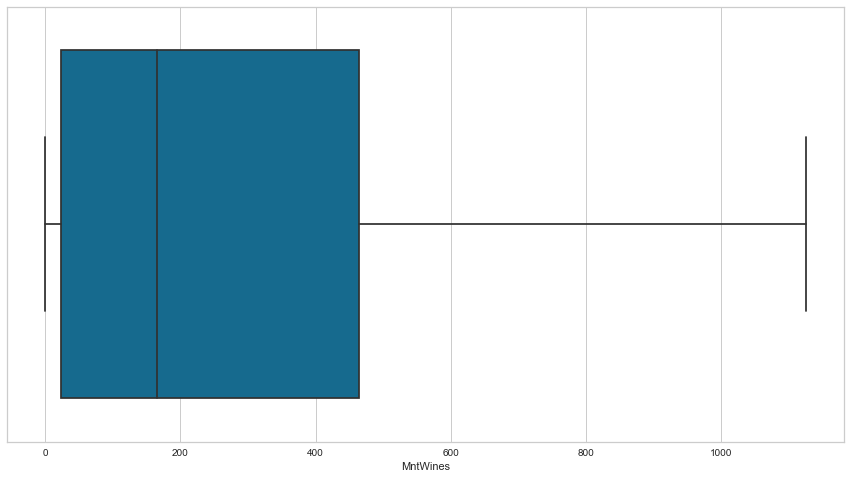

In [ ]:
#Handling the outliers by removing them
df=df[df["MntWines"]<=1130]
sns.boxplot(x=df["MntWines"])

In [ ]:
#Checking number of records
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2167 rows x 29 columns]

<AxesSubplot:xlabel='MntFruits'>

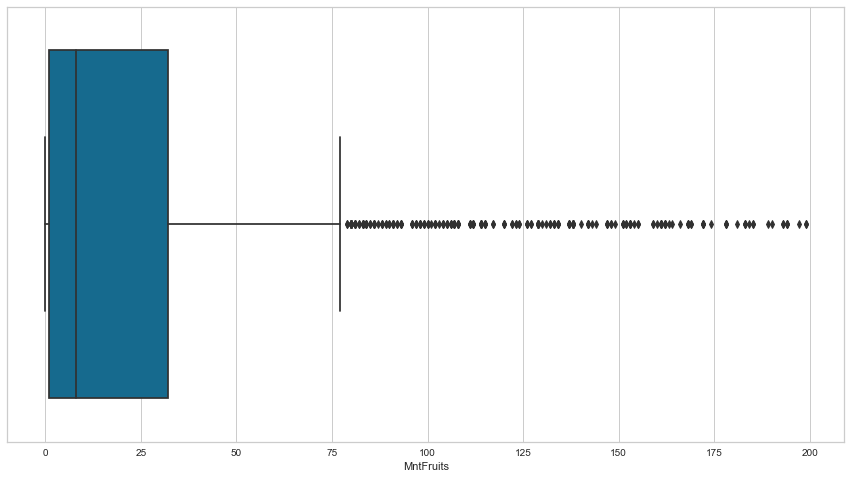

In [ ]:
#Boxploting MntFruits feature
sns.boxplot(x=df["MntFruits"])

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
counter=0
for i in df["MntFruits"]:
    if i >=85:
        df.iat[counter,10]=df["MntFruits"].mean()
    counter=counter+1

<AxesSubplot:xlabel='MntFruits'>

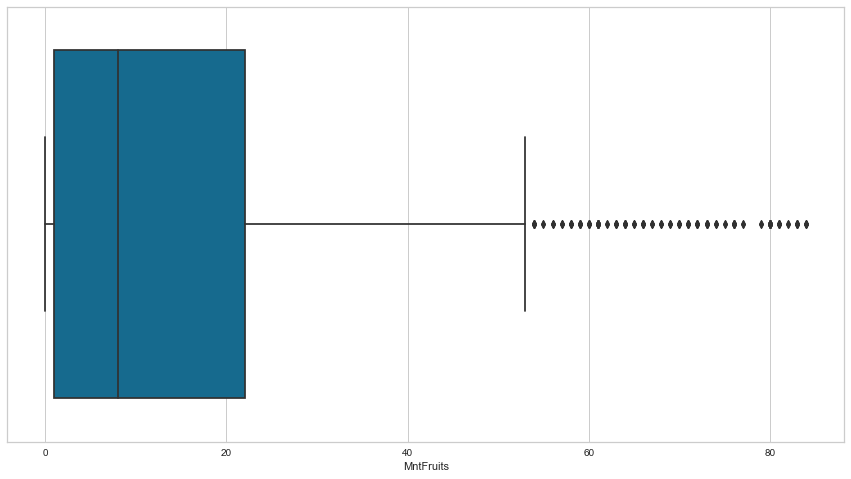

In [ ]:
#Making sure that the outliers are have been handled
sns.boxplot(x=df["MntFruits"])

<AxesSubplot:xlabel='MntMeatProducts'>

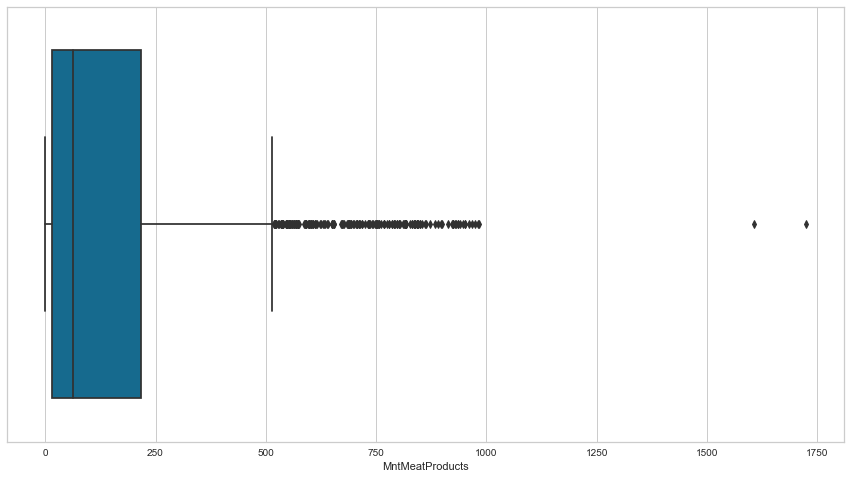

In [ ]:
#Boxploting MntMeatProducts feature
sns.boxplot(x=df["MntMeatProducts"])

In [ ]:
#Handling the outliers by replacing them with the mean of the feature and removing some of them
df=df[df["MntMeatProducts"]<=750]
counter=0
for i in df["MntMeatProducts"]:
    if i >=550:
        df.iat[counter,11]=df["MntMeatProducts"].mean()
    counter=counter+1

<AxesSubplot:xlabel='MntMeatProducts'>

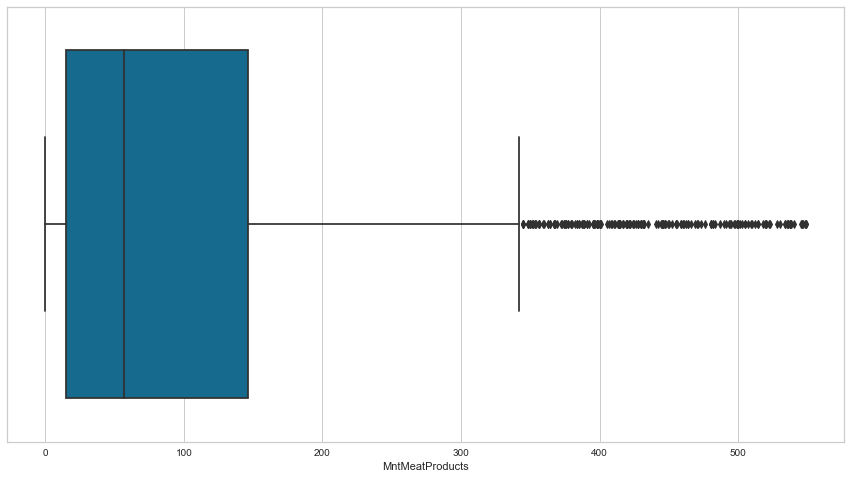

In [ ]:
#Boxploting MntMeatProducts feature
sns.boxplot(x=df["MntMeatProducts"])

In [ ]:
#Checking the number of records
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2238         1  24-01-2014        8       428  ...                  3   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2238             0             0             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2238         0              3         11         0  
2239         0              3         11         1  

[2095 rows x 29 columns]

<AxesSubplot:xlabel='MntFishProducts'>

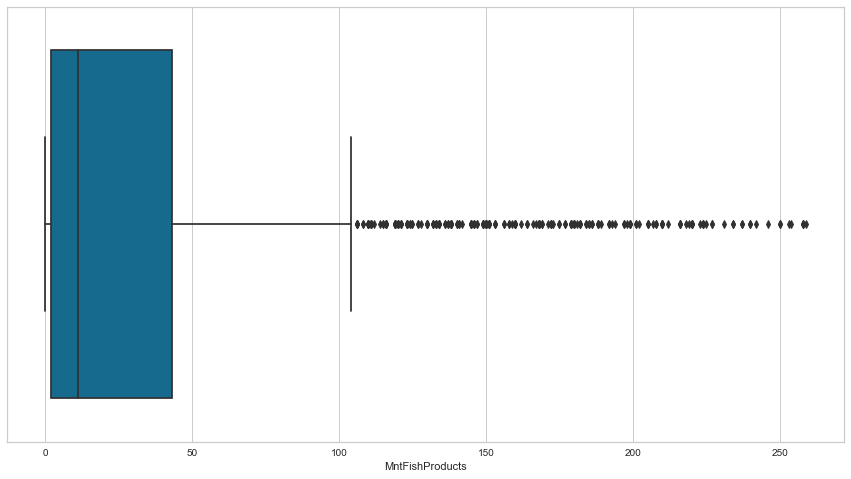

In [ ]:
#Boxploting MntFishProducts feature
sns.boxplot(x=df["MntFishProducts"])

<AxesSubplot:xlabel='MntFishProducts'>

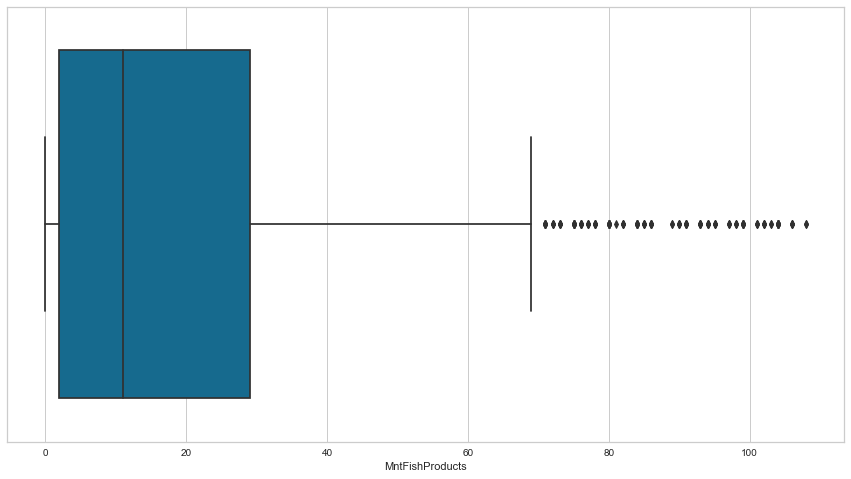

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
counter=0
for i in df["MntFishProducts"]:
    if i >=110:
        df.iat[counter,12]=df["MntFishProducts"].mean()
    counter=counter+1
sns.boxplot(x=df["MntFishProducts"])

In [ ]:
#Handling the outliers by removing them
df=df[df["MntFishProducts"]<=60]

<AxesSubplot:xlabel='MntFishProducts'>

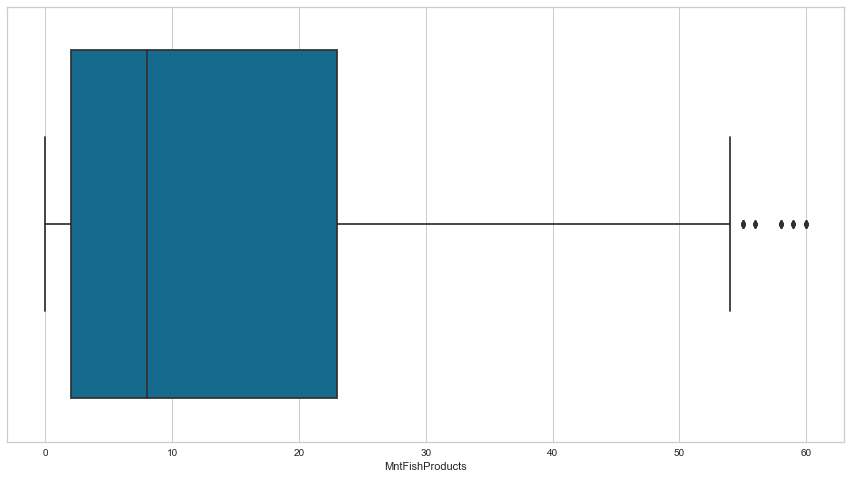

In [ ]:
#Checking that outliers have been handled
sns.boxplot(x=df["MntFishProducts"])

In [ ]:
#Checking number of records
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2234   8372        1974  Graduation        Married  34421.0        1   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2234         0  01-07-2013       81         3  ...                  7   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2234             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2234         0              3         11         0  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2239         0              3         11         1  

[1894 rows x 29 columns]

<AxesSubplot:xlabel='MntSweetProducts'>

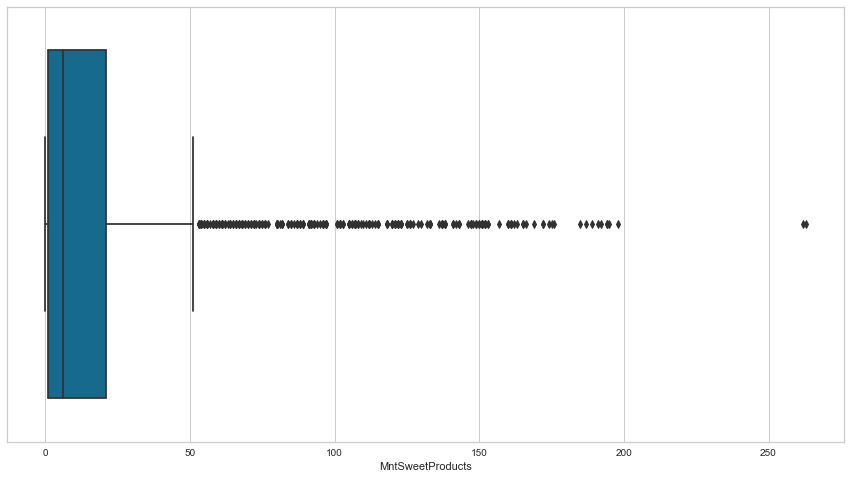

In [ ]:
#Boxploting MntSweetProducts feature
sns.boxplot(x=df["MntSweetProducts"])

<AxesSubplot:xlabel='MntSweetProducts'>

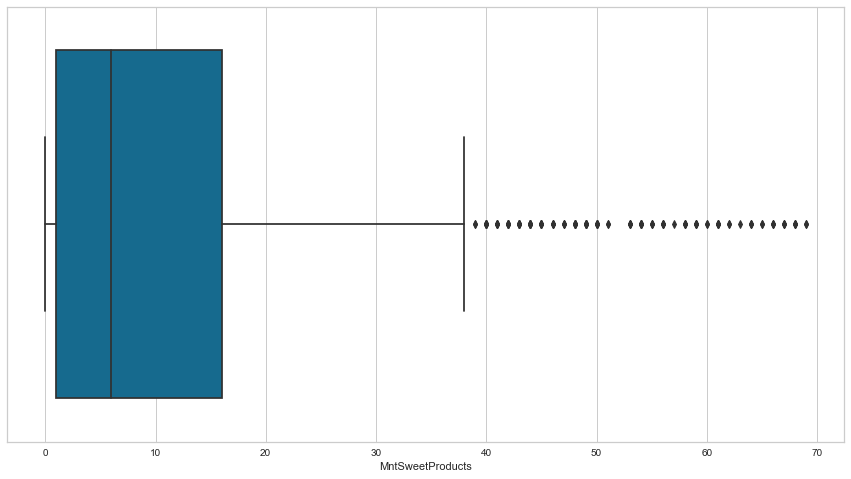

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
counter=0
for i in df["MntSweetProducts"]:
    if i >=70:
        df.iat[counter,13]=df["MntSweetProducts"].mean()
    counter=counter+1
sns.boxplot(x=df["MntSweetProducts"])

<AxesSubplot:xlabel='MntSweetProducts'>

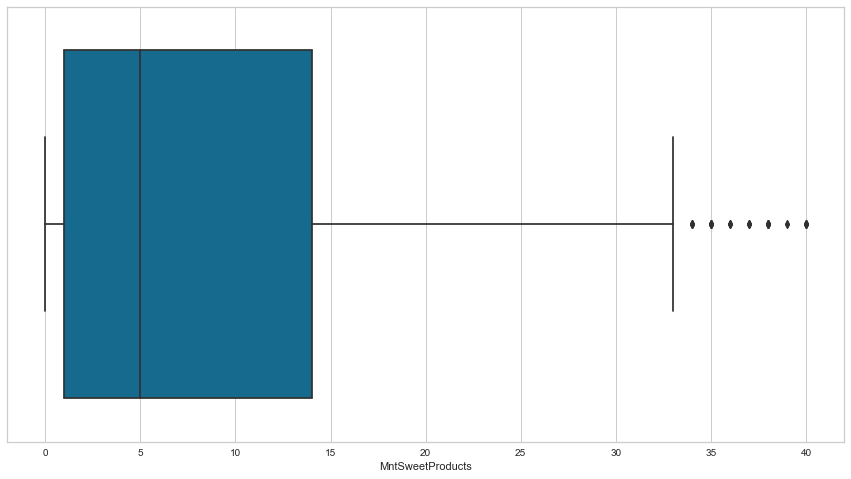

In [ ]:
#Handling the outliers by removing them
df=df[df["MntSweetProducts"]<=40]
sns.boxplot(x=df["MntSweetProducts"])

In [ ]:
#Checking the number of records
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2234   8372        1974  Graduation        Married  34421.0        1   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2234         0  01-07-2013       81         3  ...                  7   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2234             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2234         0              3         11         0  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2239         0              3         11         1  

[1779 rows x 29 columns]

<AxesSubplot:xlabel='MntGoldProds'>

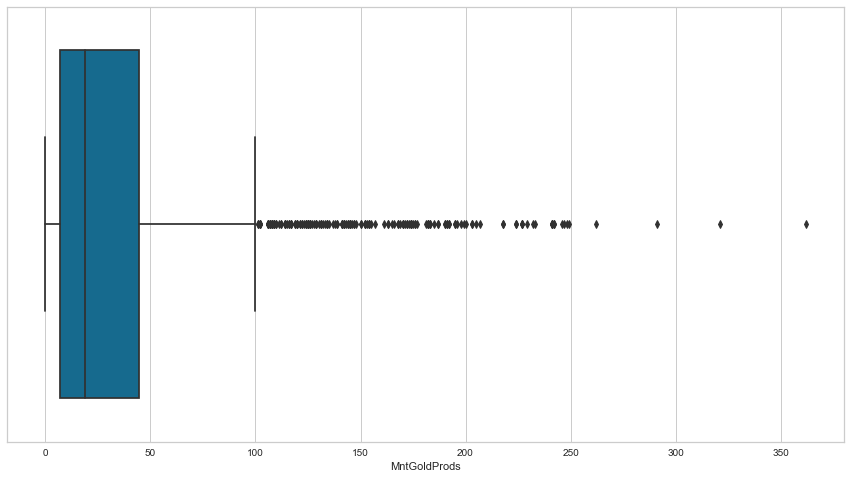

In [ ]:
#Boxploting MntGoldProds feature
sns.boxplot(x=df["MntGoldProds"])

<AxesSubplot:xlabel='MntGoldProds'>

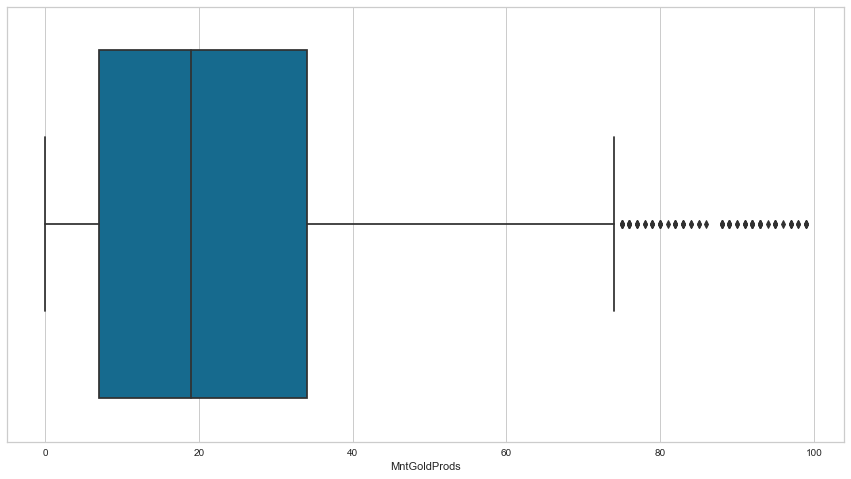

In [ ]:
#Handling the outliers by replacing them with the mean of the feature
counter=0
for i in df["MntGoldProds"]:
    if i >=100:
        df.iat[counter,14]=df["MntGoldProds"].mean()
    counter=counter+1
sns.boxplot(x=df["MntGoldProds"])

In [ ]:
#Checking the number of records
df

ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2234   8372        1974  Graduation        Married  34421.0        1   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...                  7   
1            1  08-03-2014       38        11  ...                  5   
2            0  21-08-2013       26       426  ...                  4   
3            0  10-02-2014       26        11  ...                  6   
4            0  19-01-2014       94       173  ...                  5   
...        ...         ...      ...       ...  ...                ...   
2234         0  01-07-2013       81         3  ...                  7   
2235         1  13-06-2013       46       709  ...                  5   
2236         1  10-06-2014       56       406  ...                  7   
2237         0  25-01-2014       91       908  ...                  6   
2239         1  15-10-2012       40        84  ...                  7   

      AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0                0             0             0             0             0   
1                0             0             0             0             0   
2                0             0             0             0             0   
3                0             0             0             0             0   
4                0             0             0             0             0   
...            ...           ...           ...           ...           ...   
2234             0             0             0             0             0   
2235             0             0             0             0             0   
2236             0             0             0             1             0   
2237             0             1             0             0             0   
2239             0             0             0             0             0   

      Complain  Z_CostContact  Z_Revenue  Response  
0            0              3         11         1  
1            0              3         11         0  
2            0              3         11         0  
3            0              3         11         0  
4            0              3         11         0  
...        ...            ...        ...       ...  
2234         0              3         11         0  
2235         0              3         11         0  
2236         0              3         11         0  
2237         0              3         11         0  
2239         0              3         11         1  

[1779 rows x 29 columns]

<AxesSubplot:xlabel='NumDealsPurchases'>

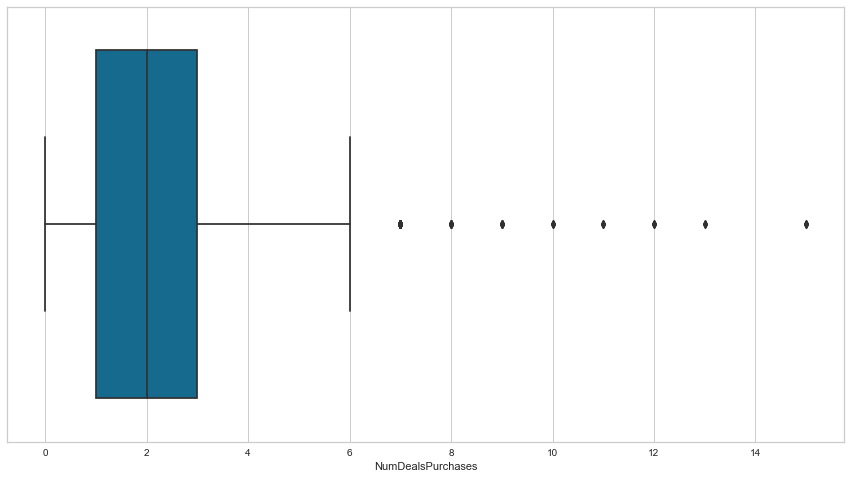

In [ ]:
#Boxploting NumDealsPurchases feature
sns.boxplot(x=df["NumDealsPurchases"])

<AxesSubplot:xlabel='NumDealsPurchases'>

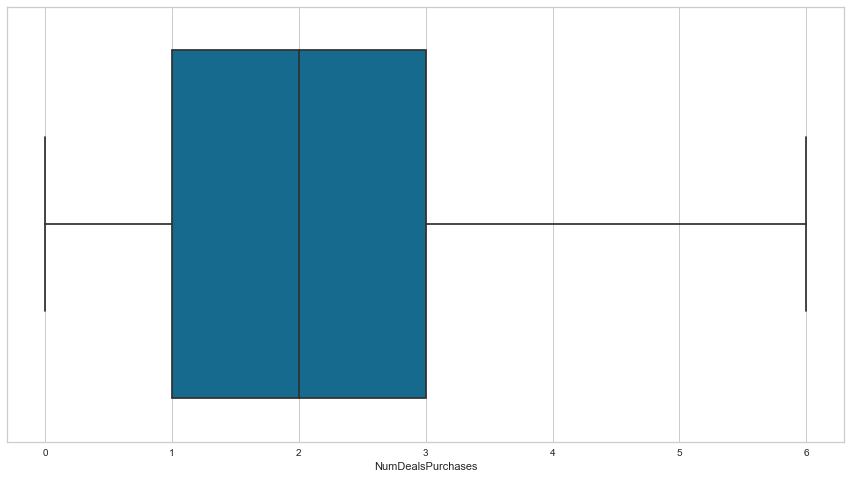

In [ ]:
#Handling the outliers by replacing them with the mode of the feature
counter=0
for i in df["NumDealsPurchases"]:
    if i >=7:
        df.iat[counter,15]=df["NumDealsPurchases"].mode()
    counter=counter+1
sns.boxplot(x=df["NumDealsPurchases"])

<AxesSubplot:xlabel='NumWebPurchases'>

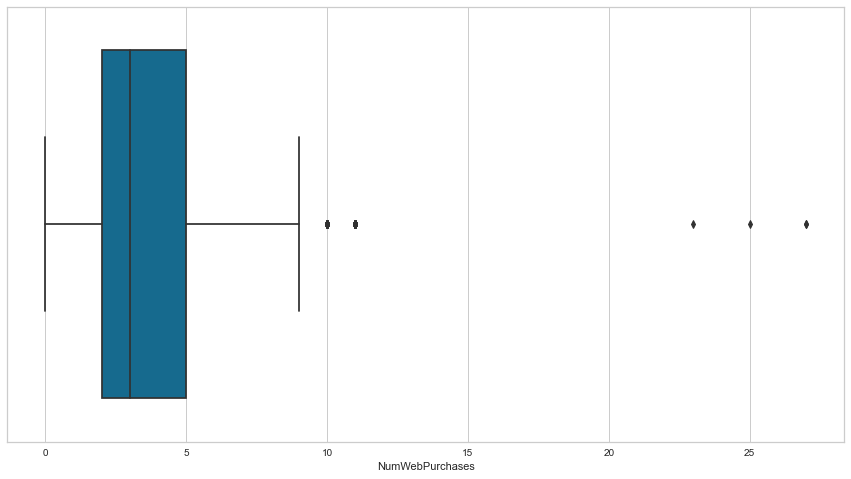

In [ ]:
#Boxploting NumWebPurchases feature
sns.boxplot(x=df["NumWebPurchases"])

<AxesSubplot:xlabel='NumWebPurchases'>

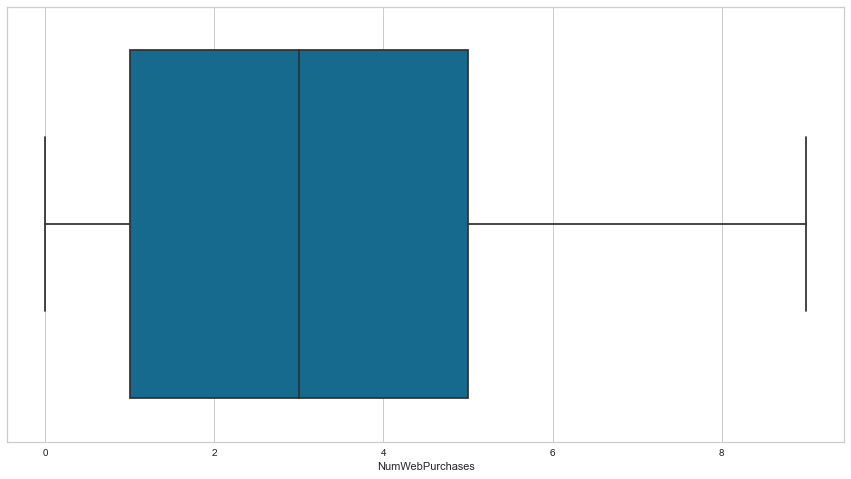

In [ ]:
#Handling the outliers by replacing them with the mode of the feature
counter=0
for i in df["NumWebPurchases"]:
    if i >=10:
        df.iat[counter,16]=df["NumWebPurchases"].mode()
    counter=counter+1
sns.boxplot(x=df["NumWebPurchases"])

<AxesSubplot:xlabel='NumCatalogPurchases'>

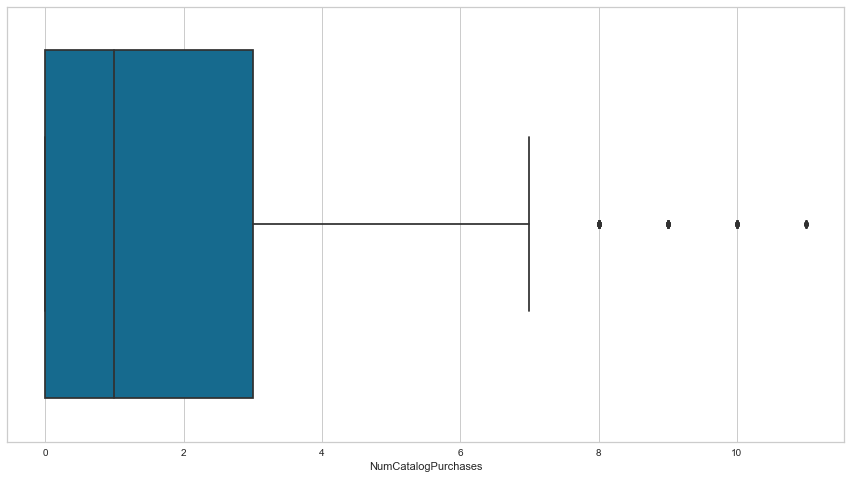

In [ ]:
#Boxploting NumCatalogPurchases feature
sns.boxplot(x=df["NumCatalogPurchases"])

<AxesSubplot:xlabel='NumCatalogPurchases'>

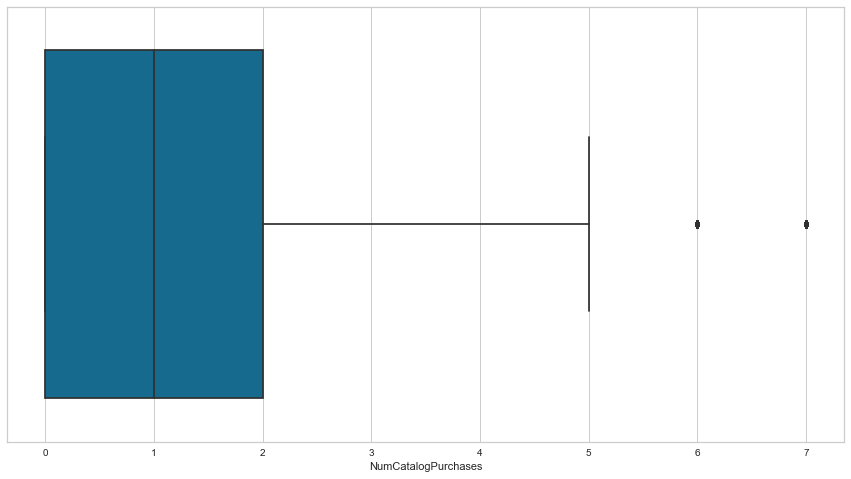

In [ ]:
#Handling the outliers by replacing them with the mode of the feature
counter=0
for i in df["NumCatalogPurchases"]:
    if i >=8:
        df.iat[counter,17]=df["NumCatalogPurchases"].mode()
    counter=counter+1
sns.boxplot(x=df["NumCatalogPurchases"])

<AxesSubplot:xlabel='NumStorePurchases'>

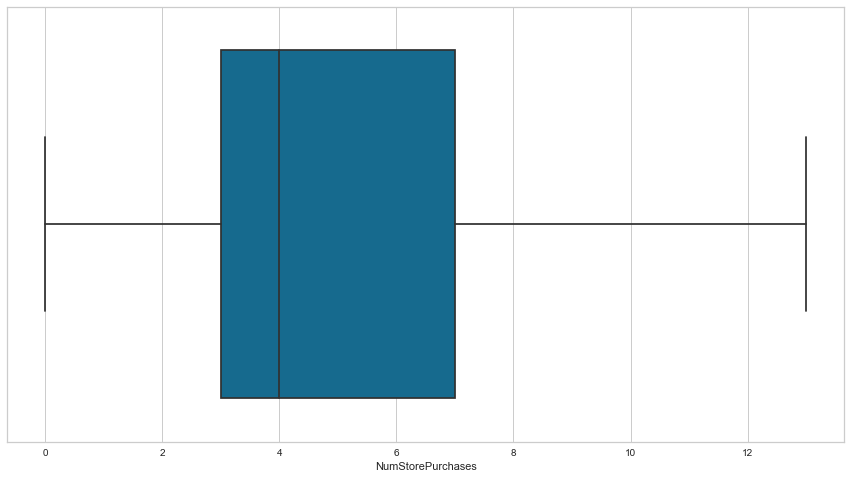

In [ ]:
#Boxploting NumStorePurchases feature
sns.boxplot(x=df["NumStorePurchases"])

<AxesSubplot:xlabel='NumWebVisitsMonth'>

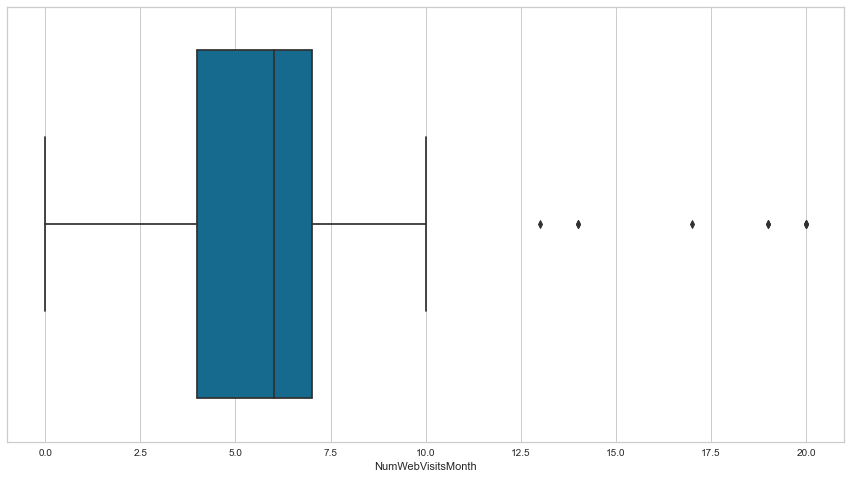

In [ ]:
#Boxploting NumWebVisitsMonth feature
sns.boxplot(x=df["NumWebVisitsMonth"])

<AxesSubplot:xlabel='NumWebVisitsMonth'>

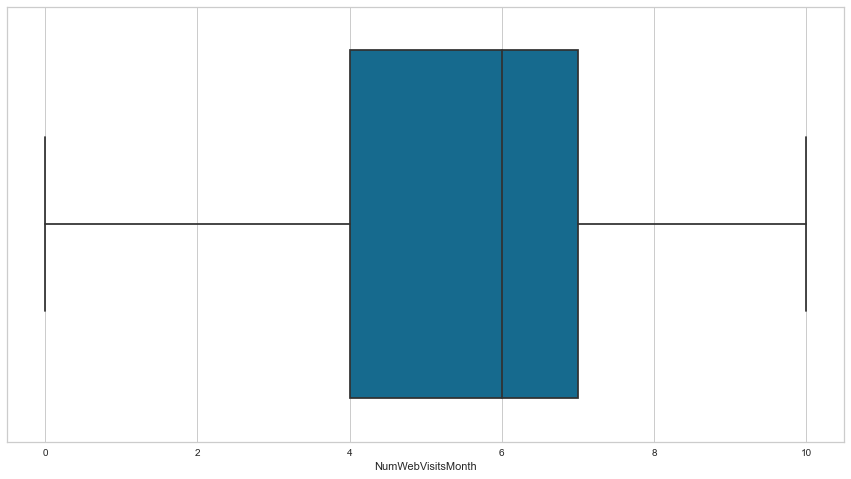

In [ ]:
#Handling the outliers by replacing them with the mode of the feature
counter=0
for i in df["NumWebVisitsMonth"]:
    if i >=12:
        df.iat[counter,19]=df["NumWebVisitsMonth"].mode()
    counter=counter+1
sns.boxplot(x=df["NumWebVisitsMonth"])

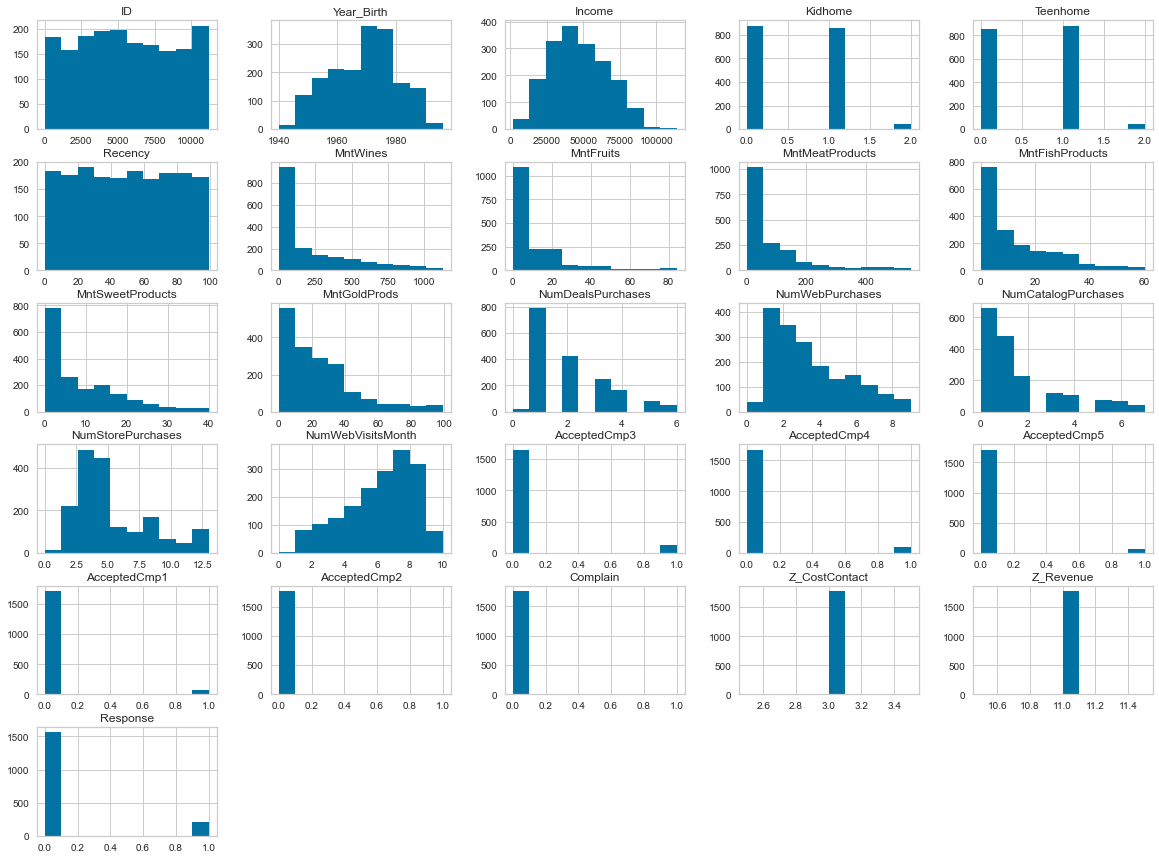

In [ ]:
#Visualizing the features to know the distribution for each one of them
df.hist(figsize=(20,15))
plt.show()

In [ ]:
#Saving a copy of the dataset
df.to_csv("Customer_Segmentation_V1.csv",index=False)

### - Feature Engineering

In [ ]:
#Droping features that will affect the modeling step
df.drop(['Z_CostContact','Z_Revenue','Complain','ID',"Recency",'NumWebVisitsMonth'],axis=1,inplace=True)

In [ ]:
#Adding a new feature (MntTotal) that sums all the spending for each customer
df["MntTotal"]=df["MntWines"]+df["MntFruits"]+df["MntMeatProducts"]+df["MntFishProducts"]+df["MntSweetProducts"]+df["MntGoldProds"]

In [ ]:
#Checking the new feature
df["MntTotal"]

0       1349
1         27
2        699
3         53
4        422
        ... 
2234      30
2235    1011
2236     444
2237    1241
2239     172
Name: MntTotal, Length: 1779, dtype: int64

In [ ]:
#Converting the Dt_Customer feature to a datetime feature
df["Dt_Customer"]=pd.to_datetime(df["Dt_Customer"])

In [ ]:
#Checking the data types of the dataset
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                        float64
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
MntTotal                        int64
dtype: object

In [ ]:
#Converting Income feature from float to integar
df["Income"]=df["Income"].astype("int32")

In [ ]:
#Checking the data types
df.dtypes

Year_Birth                      int64
Education                      object
Marital_Status                 object
Income                          int32
Kidhome                         int64
Teenhome                        int64
Dt_Customer            datetime64[ns]
MntWines                        int64
MntFruits                       int64
MntMeatProducts                 int64
MntFishProducts                 int64
MntSweetProducts                int64
MntGoldProds                    int64
NumDealsPurchases               int64
NumWebPurchases                 int64
NumCatalogPurchases             int64
NumStorePurchases               int64
AcceptedCmp3                    int64
AcceptedCmp4                    int64
AcceptedCmp5                    int64
AcceptedCmp1                    int64
AcceptedCmp2                    int64
Response                        int64
MntTotal                        int64
dtype: object

In [ ]:
#Moving the MntTotal feature for better arrangement
col_to_move=df.pop("MntTotal")
df.insert(15, "MntTotal", col_to_move)

In [ ]:
#Checking that the feature has been moved
df.head()

Year_Birth   Education Marital_Status  Income  Kidhome  Teenhome  \
0        1957  Graduation         Single   58138        0         0   
1        1954  Graduation         Single   46344        1         1   
2        1965  Graduation       Together   71613        0         0   
3        1984  Graduation       Together   26646        1         0   
4        1981         PhD        Married   58293        1         0   

  Dt_Customer  MntWines  MntFruits  MntMeatProducts  ...  NumWebPurchases  \
0  2012-04-09       635         25              546  ...                8   
1  2014-08-03        11          1                6  ...                1   
2  2013-08-21       426         49              127  ...                8   
3  2014-10-02        11          4               20  ...                2   
4  2014-01-19       173         43              118  ...                5   

   MntTotal  NumCatalogPurchases  NumStorePurchases  AcceptedCmp3  \
0      1349                    0                  4             0   
1        27                    1                  2             0   
2       699                    2                 10             0   
3        53                    0                  4             0   
4       422                    3                  6             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Response  
0             0             0             0             0         1  
1             0             0             0             0         0  
2             0             0             0             0         0  
3             0             0             0             0         0  
4             0             0             0             0         0  

[5 rows x 24 columns]

In [ ]:
#Adding a new feature (Age) from another feature (Year_Birth) that is better for modeling
df["Age"]=2021-df["Year_Birth"]
df=df[df["Age"]<=120]
df.drop(["Year_Birth"],axis=1,inplace=True)

In [ ]:
#Adding a new feature (customer_since) from another feature (Dt_Customer) that is better for modeling
df["Y"]=pd.to_datetime(df["Dt_Customer"]).dt.year
df["M"]=pd.to_datetime(df["Dt_Customer"]).dt.month
df["customer_since"]=((2021-df["Y"])*12)+df["M"]
df.drop(["Y","M","Dt_Customer"],axis=1,inplace=True)
df["customer_since"]

0       112
1        92
2       104
3        94
4        85
       ... 
2234     97
2235    102
2236     94
2237     85
2239    118
Name: customer_since, Length: 1779, dtype: int64

In [ ]:
#Checking the new features
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'MntTotal', 'NumCatalogPurchases',
       'NumStorePurchases', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Response', 'Age', 'customer_since'],
      dtype='object')

In [ ]:
#Droping features won't be needed for modeling after getting it's values in another feature (Response)
for i in range(0,len(df)):
    if df.iat[i,18]==1 or df.iat[i,19]==1 or df.iat[i,20]==1 or df.iat[i,21]==1 or df.iat[i,22]==1 :
        df.iat[i,21]=1
df.drop(["AcceptedCmp3","AcceptedCmp4","AcceptedCmp5","AcceptedCmp1","AcceptedCmp2"],axis=1,inplace=True)

In [ ]:
#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married": 2, "Together": 2, "Absurd": 1, "Widow": 1, "YOLO": 1, "Divorced": 1, "Single": 1,"Alone": 1})
df.drop(['Marital_Status'],axis=1,inplace=True)

In [ ]:
df.dtypes

Education              object
Income                  int32
Kidhome                 int64
Teenhome                int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
MntTotal                int64
NumCatalogPurchases     int64
NumStorePurchases       int64
Response                int64
Age                     int64
customer_since          int64
Living_With             int64
dtype: object

In [ ]:
#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})


In [ ]:
#Adding a new feature (family_members) that sums the number of each famliy members from another features
df["family_members"]=df["Kidhome"]+df["Teenhome"]+df["Living_With"]
df["family_members"]
df.drop(["Kidhome","Teenhome","Living_With"],axis=1,inplace=True)

In [ ]:
#Checking the data types
df.dtypes

Education              object
Income                  int32
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
MntTotal                int64
NumCatalogPurchases     int64
NumStorePurchases       int64
Response                int64
Age                     int64
customer_since          int64
family_members          int64
dtype: object

In [ ]:
#Get list of categorical variables
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

In [ ]:
#Label Encoding
LE=LabelEncoder()
#Label Encoding object dtypes to numeric dtypes
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)

In [ ]:
#Checking the data before modeling
df.head()

Education  Income  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
0          0   58138       635         25              546               34   
1          0   46344        11          1                6                2   
2          0   71613       426         49              127               34   
3          0   26646        11          4               20               10   
4          1   58293       173         43              118               46   

   MntSweetProducts  MntGoldProds  NumDealsPurchases  NumWebPurchases  \
0                21            88                  3                8   
1                 1             6                  2                1   
2                21            42                  1                8   
3                 3             5                  2                2   
4                27            15                  5                5   

   MntTotal  NumCatalogPurchases  NumStorePurchases  Response  Age  \
0      1349                    0                  4         1   64   
1        27                    1                  2         0   67   
2       699                    2                 10         0   56   
3        53                    0                  4         0   37   
4       422                    3                  6         0   40   

   customer_since  family_members  
0             112               1  
1              92               3  
2             104               2  
3              94               3  
4              85               3

# Perform dimensionality reduction
By reducing the number of features, we’re improving the performance of our algorithm. On top of that, by decreasing the number of features the noise is also reduced

### using PCA
Principal component analysis (PCA): is a technique for reducing the dimensionality of datasets, increasing interpretability but at the same time minimizing information loss.

In [ ]:
#importing PCA from SkLearn library
from sklearn.decomposition import PCA
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
#fit the model and apply the dimensionality reduction on dataset
pca.fit(df.values)
x_pca = pd.DataFrame(pca.transform(df.values), columns=(["col1","col2", "col3"]))
x_pca.describe()



col1          col2          col3
count  1.779000e+03  1.779000e+03  1.779000e+03
mean   1.788826e-12  3.530746e-14  5.369011e-15
std    1.932067e+04  3.064727e+02  9.940519e+01
min   -4.515192e+04 -1.249552e+03 -3.313377e+02
25%   -1.461779e+04 -1.580041e+02 -4.168608e+01
50%   -1.699751e+03  3.700729e+01 -6.205206e+00
75%    1.436234e+04  1.972800e+02  2.662828e+01
max    6.683120e+04  1.714501e+03  4.302832e+02

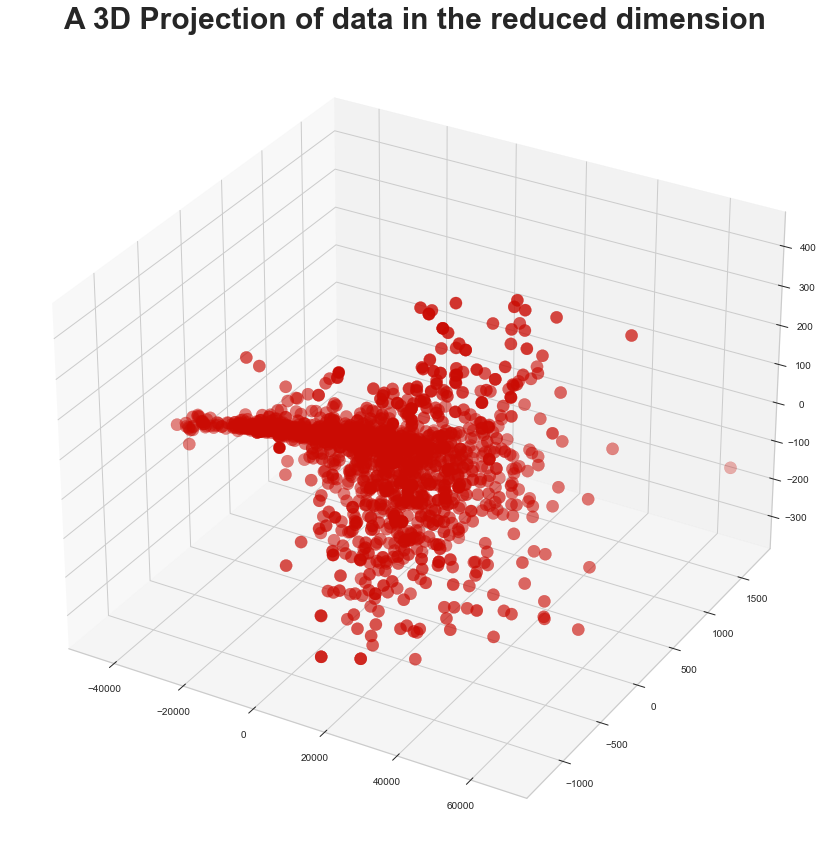

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x=x_pca['col1']
y=x_pca['col2']
z=x_pca['col3']
# Scatter Plotting PCA

fig=plt.figure(figsize=(15,15))
xyz=fig.add_subplot(111,projection="3d")
xyz.scatter(x,y,z,s=150, c='r' , marker="o")
xyz.set_title("A 3D Projection of data in the reduced dimension",fontsize=30,weight='bold')
plt.show()

The clusters seem to be fairly distributed.

# CLUSTERING:

### First apply Elbow Method
#### to determine the optimal number of clusters
Elbow method uses:

1-Inertia: It is the sum of squared distances of samples to their closest cluster center

2-Distortion: It is calculated as the average of the squared distances from the cluster centers of the respective clusters. Typically, the Euclidean distance metric is used

 use k-means++ (it is a KMeans with carefully initialized centroides)


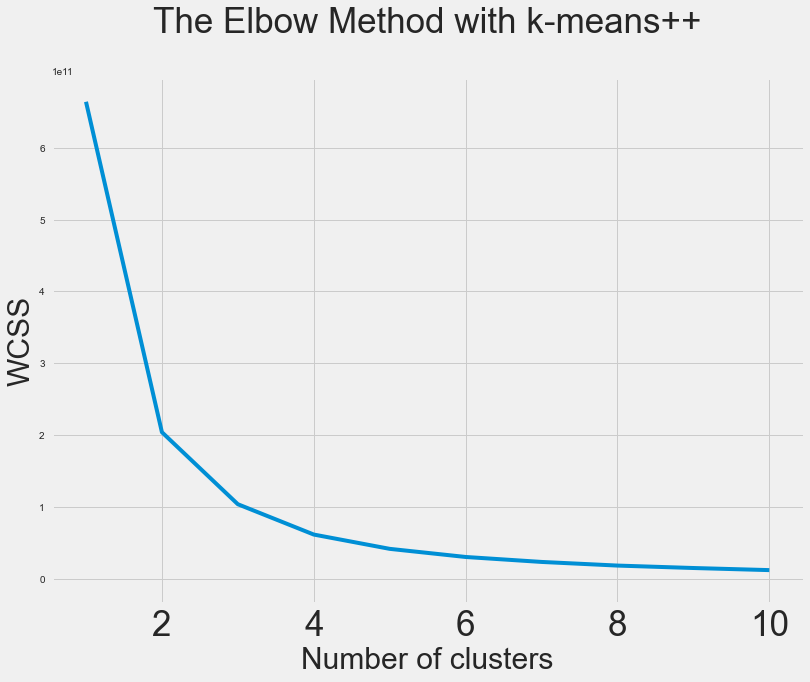

In [ ]:
# using WCSS(within cluster sum of squared distances) matric
wcss=[]
for i in range (1,11):
    clu = KMeans(n_clusters=i,init ='k-means++')
    clu.fit(df)
    wcss.append(clu.inertia_)
with plt.style.context(('fivethirtyeight')):
    plt.figure(figsize=(12,9))
    plt.plot(range(1, 11), wcss)
    plt.title('The Elbow Method with k-means++\n',fontsize=35)
    plt.xlabel('Number of clusters',fontsize=30)
    plt.xticks(fontsize=35)
    plt.ylabel('WCSS',fontsize=30)
    plt.vlines(3, 0, 1, linestyles ="dashed", colors ="k")
    plt.show()

# Hierarchical (connactivity based clustering)

is an unsupervised clustering algorithm used to create clusters with a tree-like hierarchy

## 1-Agglomerative Cluatering Model

It takes a bottom-up approach where it assumes individual data observation to be one cluster at the start. Then it starts merging the data points into clusters till it creates one final cluster at the end with all data points

### Definations:
DENDOGRAMS:are tree diagrams frequently used to illustrate the arrangement of the clusters produced by hierarchical clustering. The clades are arranged according to how similar (or dissimilar) they are. Clades that are close to the same height are similar to each other; clades with different heights are dissimilar — the greater the difference in height the more dissimilarity.
### Parameters:
n_clusters : The number of clusters estimated

Affinity: denotes the method using which distance or similarity between data points or clusters is calculated.

Linkage:The clusters are formed by using different types of criteria or knowns as linkage functions.linkage methods use the affinity


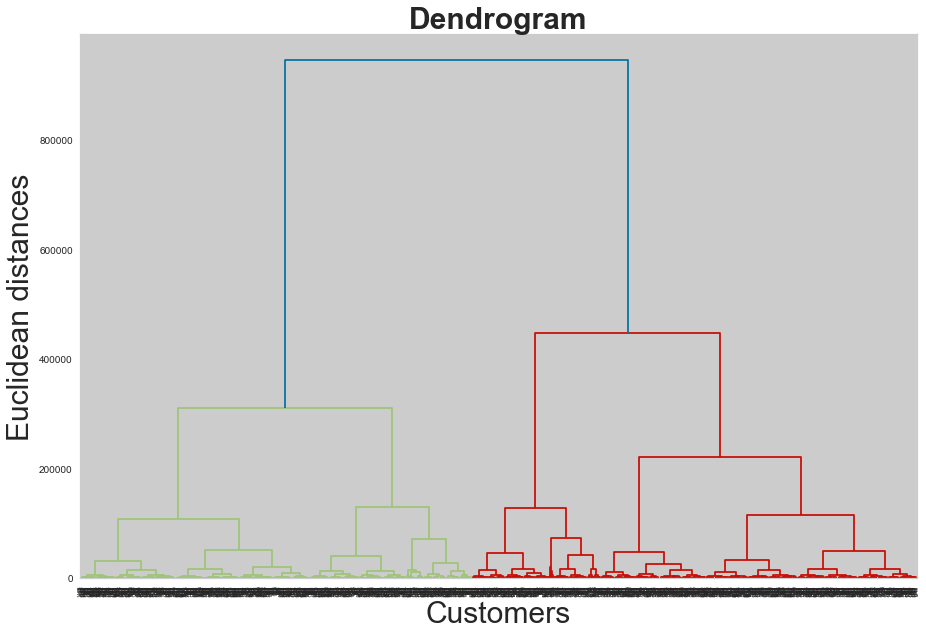

In [ ]:
#Dendrogram plot
plt.figure(figsize=(15,10))
plt.title('Dendrogram',fontsize=30,weight='bold')
plt.xlabel('Customers',fontsize=30)
plt.ylabel('Euclidean distances',fontsize=30)
plt.hlines(y=0.5,xmin=0,xmax=2000,lw=3,linestyles='--')
plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(df, method = 'ward',metric='euclidean'))
plt.show()

In [ ]:
#building Agglomerative Clustering modelg
ac=AgglomerativeClustering(n_clusters=2,affinity='euclidean',linkage='ward')
# fit model and creating the prediction of the dataset
pre_ac=ac.fit_predict(x_pca)
# Assigning the Clusters feature to the Data In The Reduced Dimension
x_pca["Clusters"]=pre_ac
#Assigning the Clusters feature to the orignal dataframe.
df["Clusters"]= pre_ac


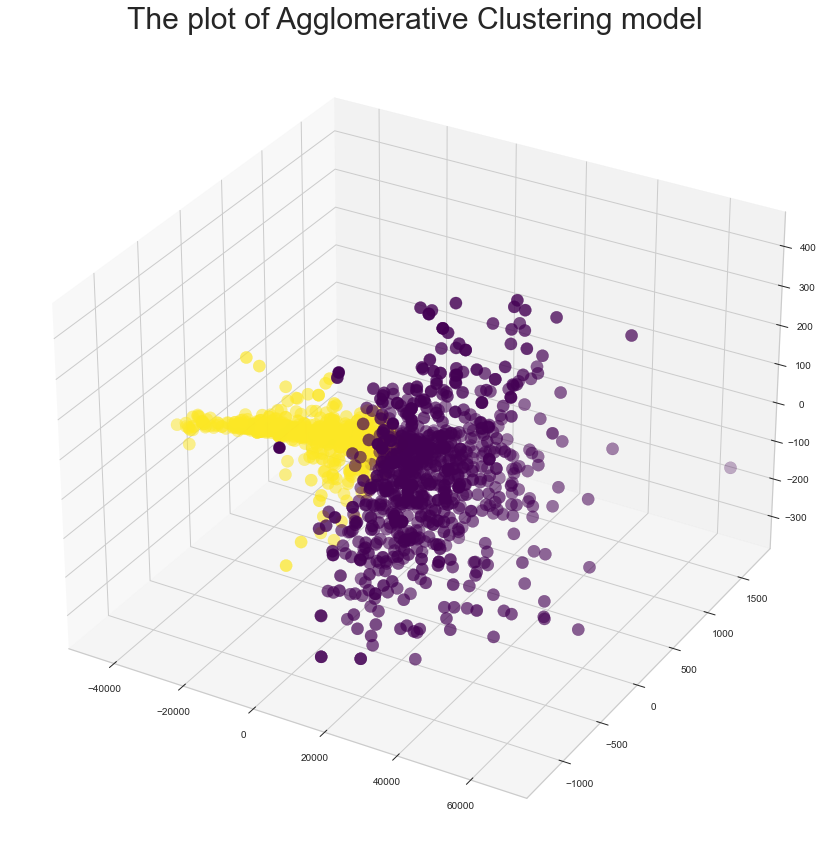

In [ ]:
# plotting the clusters in Dataset
#3D projection
fig = plt.figure(figsize=(20,15))
plot = plt.subplot(111, projection='3d', label="bla")
plot.set_title("The plot of Agglomerative Clustering model",fontsize=30)

plot.scatter(x,y,z ,s=150 ,c=pre_ac , marker='o',cmap='viridis')
plt.show()

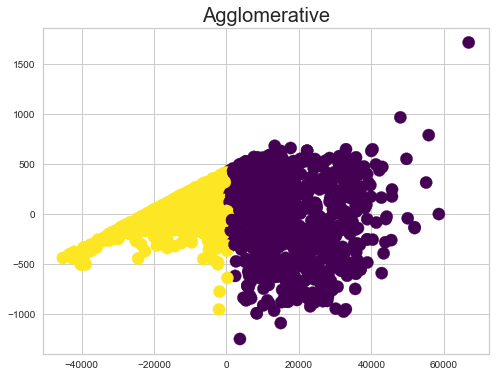

In [ ]:
# 2D projection plotting
fig =plt.figure(figsize=(8,6))
plt.title("Agglomerative",fontsize=20)
plt.scatter(x,y, c=pre_ac, s=150, cmap='viridis')

In [ ]:
#evaluation metrics
from sklearn.metrics import silhouette_samples ,silhouette_score
score = silhouette_score(x_pca,ac.labels_, metric='euclidean')
print('Silhouetter Score for Agglomerative Clustering model: %.3f' % score)

Silhouetter Score for Agglomerative Clustering model: 0.590


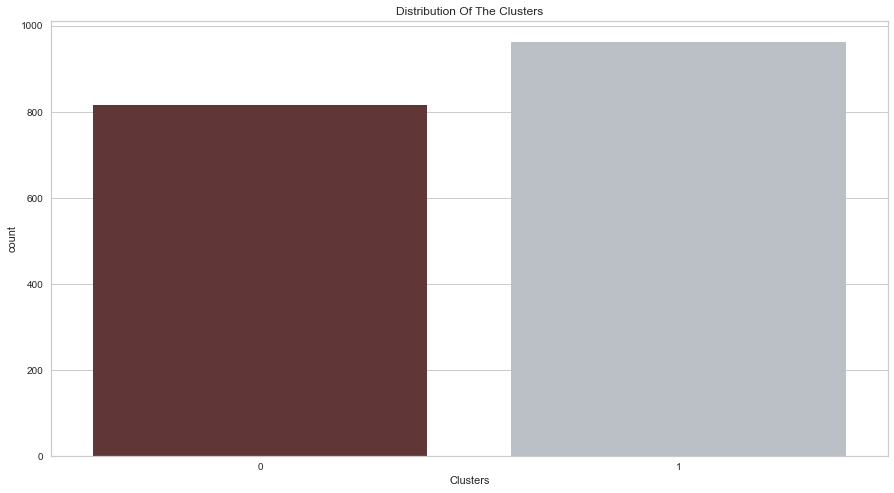

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

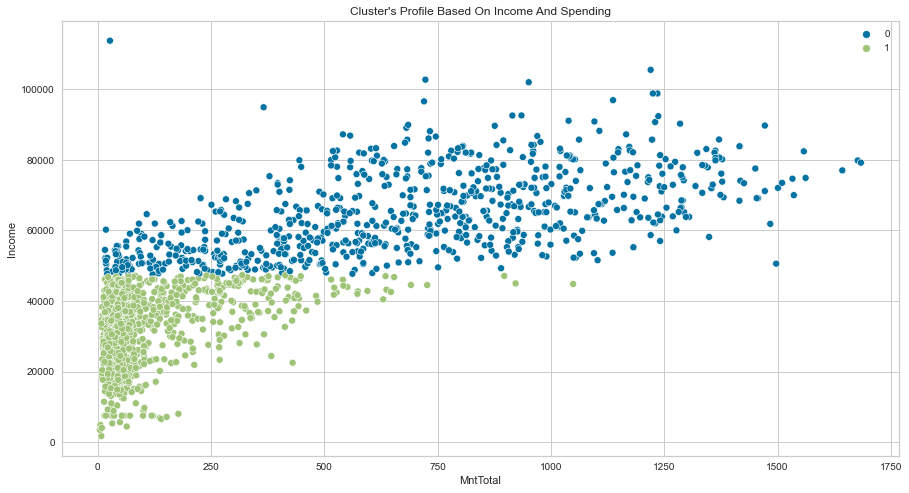

In [ ]:
pl = sns.scatterplot(data = df,x=df["MntTotal"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## 2-BIRCH Clustering Model


 Balanced Iterative Reducing and Clustering using Hierarchies (BIRCH):is a clustering algorithm that can cluster large numerical datasets, done by integration of hierarchial clustering and other clustering methods,by first generating a small and compact summary of the large dataset that retains as much information as possible. This smaller summary is then clustered instead of clustering the larger dataset


-it only requires a one-time scan of the dataset, making it fast for working with large datasets

-This algorithm is based on the CF (clustering features) tree:The clustering Feature tree is a tree in which each leaf node consists of a sub-cluster. Each entry in a CF tree holds a pointer to a child node. The CF entry is made up of the sum of CF entries in the child nodes.

## Parameters
 -threshold : threshold is the maximum number of data points a sub-cluster in the leaf node of the CF tree can hold.

 -branching_factor : This parameter specifies the maximum number of CF sub-clusters in each node (internal node).

 -n_clusters : The number of clusters to be returned after the entire BIRCH algorithm is complete i.e., number of clusters after the final clustering step. If set to None, the final clustering step is not performed and intermediate clusters are returned.


In [ ]:
#importing from SkLearn library Birch Clustering Model
from sklearn.cluster import Birch
#Birch clustering Model
birch = Birch(branching_factor=50,n_clusters=None,threshold=1.5)
# fit model and predict clusters
pre_b=birch.fit_predict(x_pca)
#Assigning the cluster feature to the Data In The Reduced Dimension
x_pca["Clusters"]=pre_b
#Assigning the Clusters feature to the orignal dataframe.
df["Clusters"]=pre_b

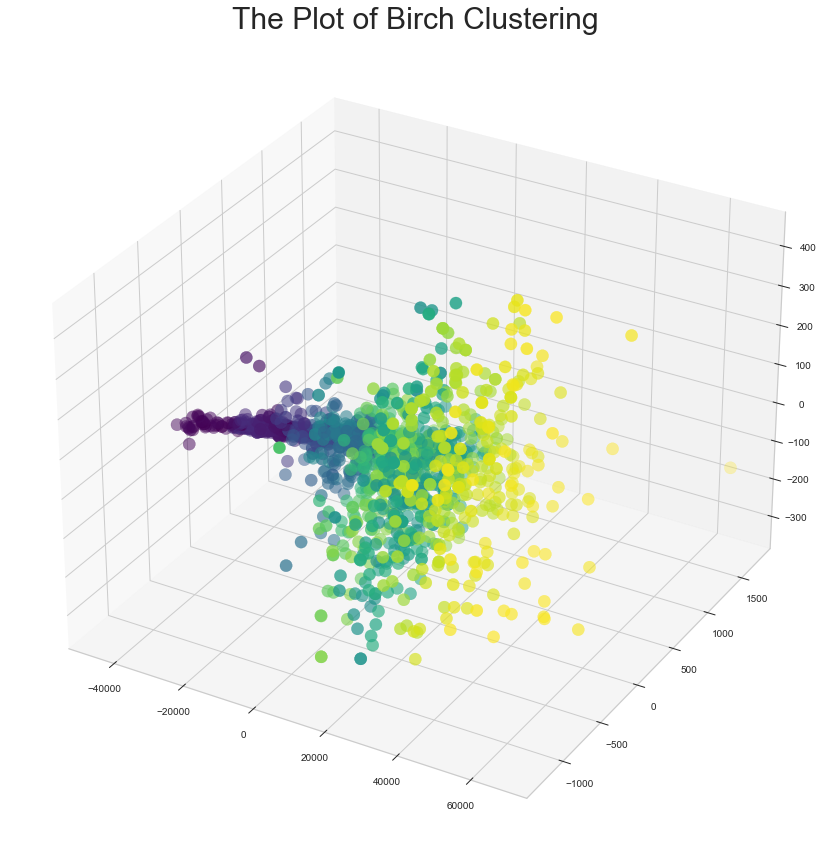

In [ ]:
# plotting the clusters in Dataset
#3D projection
fig = plt.figure(figsize=(20,15))
plot=plt.subplot(111,projection='3d',label="bla")
plot.set_title("The Plot of Birch Clustering",fontsize=30)
plot.scatter(x,y,z ,s=150 ,c=pre_b, marker='o',cmap='viridis')
plt.show()

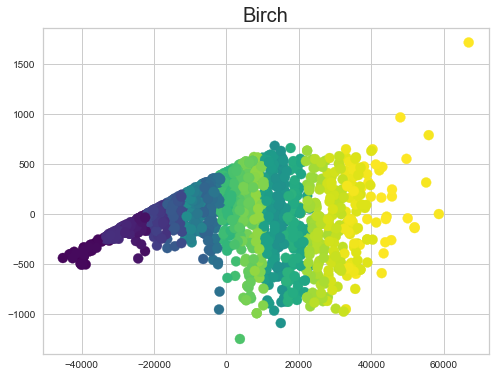

In [ ]:
#2D projection
fig =plt.figure(figsize=(8,6))
plt.title("Birch",fontsize=20)
plt.scatter(x,y, c=pre_b, s=100, cmap='viridis')



In [ ]:
#evaluation metrics
score = silhouette_score(x_pca, birch.labels_, metric='euclidean')
print('Silhouetter Score for BIRCH Clustering Model: %.3f' % score)

Silhouetter Score for BIRCH Clustering Model: 0.155


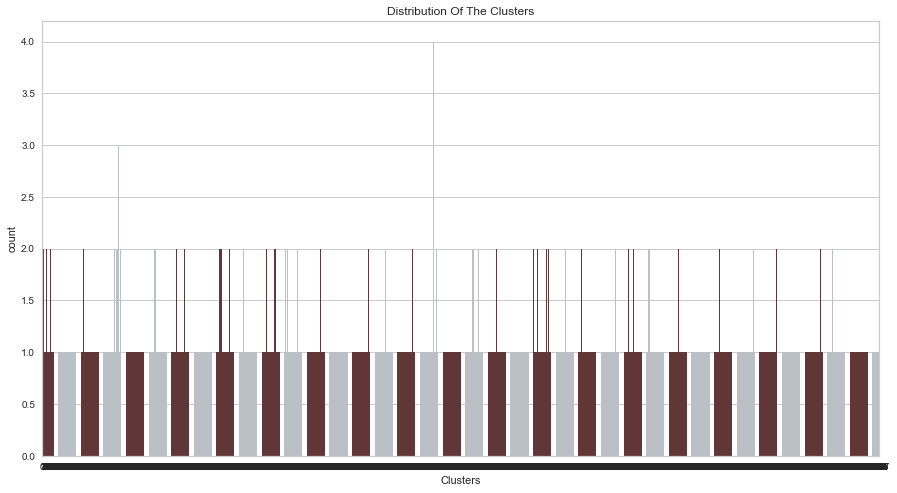

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

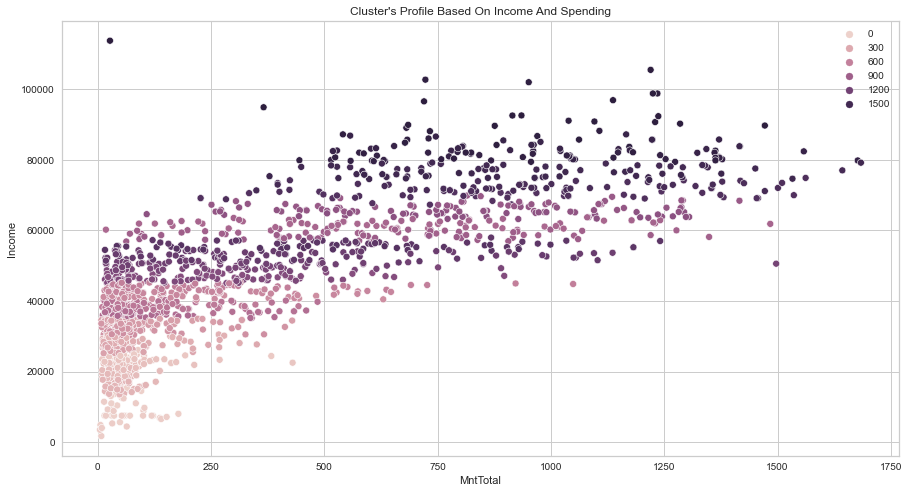

In [ ]:
pl = sns.scatterplot(data = df,x=df["MntTotal"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# AffinityPropagation Clustering Model

-Affinity propagation is an clustering algorithm based on the concept of “Message passing” between the data points.in which takes as input measures of similarity between pairs of data points. Real-valued messages are exchanged between data points until a high-quality set of exemplars and corresponding clusters gradually emerges

-Affinity propagation does not require the number of clusters to be determined or estimated before running the algorithm.

## parameters:
-max_iter: maximum number of iterations

-Damping:Damping factor in the range [0.5, 1.0] is the extent to which the current value is maintained relative to incoming values (weighted 1 - damping). This in order to avoid numerical oscillations when updating these values (messages).

Affinity: denotes the method using which distance or similarity between data points or clusters is calculated

In [ ]:
from sklearn.cluster import AffinityPropagation

af=AffinityPropagation(damping=0.7,max_iter=200,affinity='euclidean',random_state=42)
pre_af=af.fit_predict(x_pca)
#Assigning the cluster feature to the Data In The Reduced Dimension
x_pca["Clusters"]=pre_af
#Assigning the Clusters feature to the orignal dataframe.
df["Clusters"]=pre_af



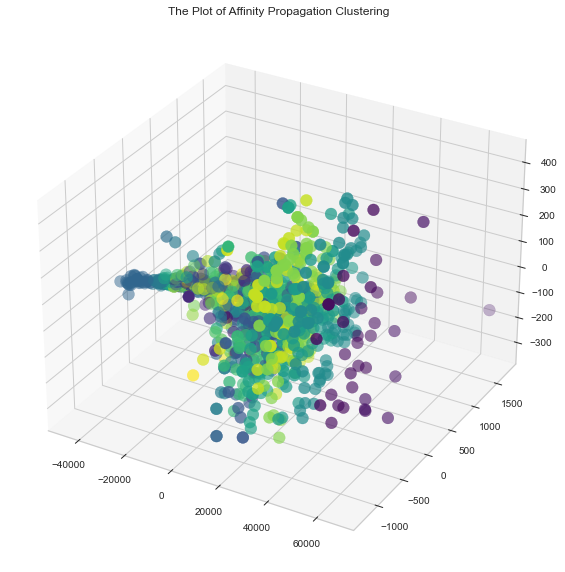

In [ ]:
fig=plt.figure(figsize=(15,10))
plot=plt.subplot(111,projection='3d',label='bla')
plot.scatter(x,y,z ,s=140,c=pre_af,marker='o',cmap='viridis')
plot.set_title("The Plot of Affinity Propagation Clustering",)
plt.show()

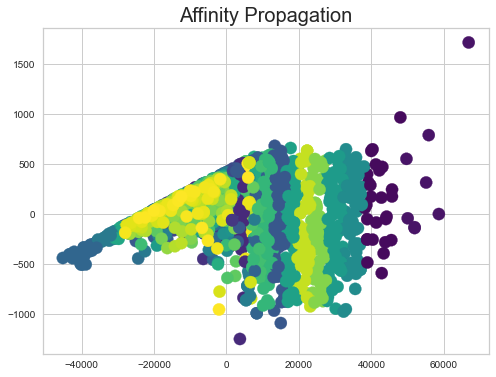

In [ ]:
fig =plt.figure(figsize=(8,6))
plt.title("Affinity Propagation",fontsize=20)
plt.scatter(x,y, c=pre_af, s=150, cmap='viridis')


In [ ]:
score = silhouette_score(x_pca,af .labels_, metric='euclidean')
print('Silhouetter Score for AffinityPropagation  Clustering Model: %.3f' % score)

Silhouetter Score for AffinityPropagation  Clustering Model: 0.214


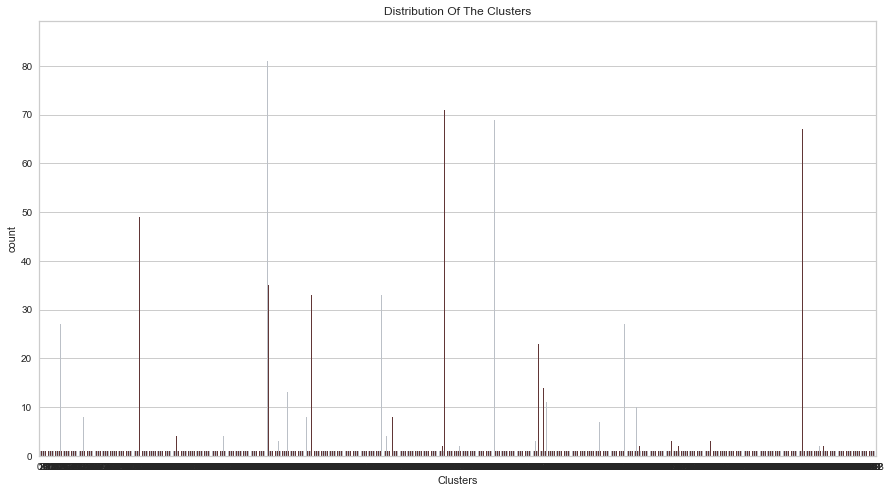

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

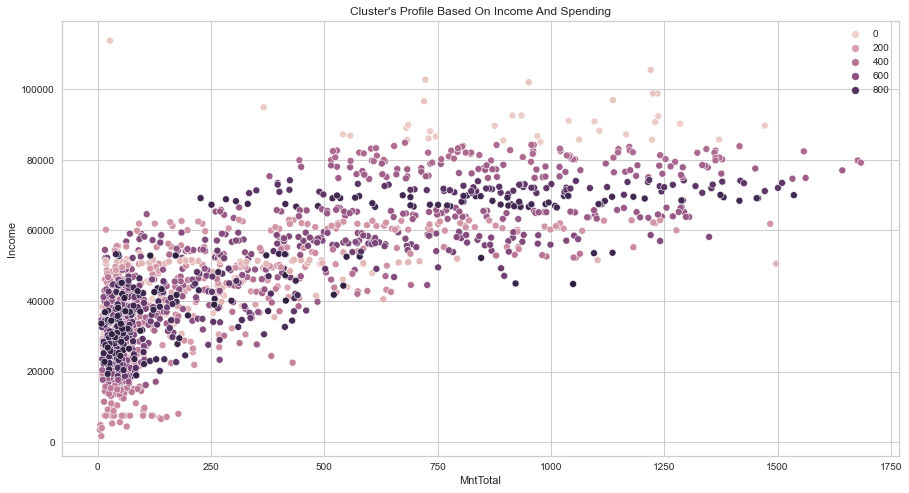

In [ ]:
pl = sns.scatterplot(data = df,x=df["MntTotal"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Segmentation-Based Object Categorization

## 1-Spectral Clustering Model

Spectral Clustering: It treats each data point as a graph-node and thus transforms the clustering problem into a graph-partitioning problem

-is a common method used for cluster analysis on high-dimensional and often complex data.

-It works by performing dimensionality reduction on the input and generating clusters in the reduced dimensional space. Since our data doesn’t contain many inputs, this will mainly be for illustration purposes, but it should be straightforward to apply this method to more complicated and larger data sets.

## parameters:
n_clusters : The number of clusters estimated

Affinity: denotes the method using which distance or similarity between data points or clusters is calculated.

In [ ]:
#importing from SkLearn library Spectral Clustering Model
from sklearn.cluster import SpectralClustering
# Building the Spectral clustering model
spectral = SpectralClustering(n_clusters=2,affinity='nearest_neighbors',random_state=42)
# fit model and Storing the predicted cluster labels
pre_spe=spectral.fit_predict(x_pca)
#Assigning the cluster feature to the Data In The Reduced Dimension
x_pca["Clusters"]=pre_spe
#Assigning the Clusters feature to the orignal dataframe.
df["Clusters"]=pre_spe


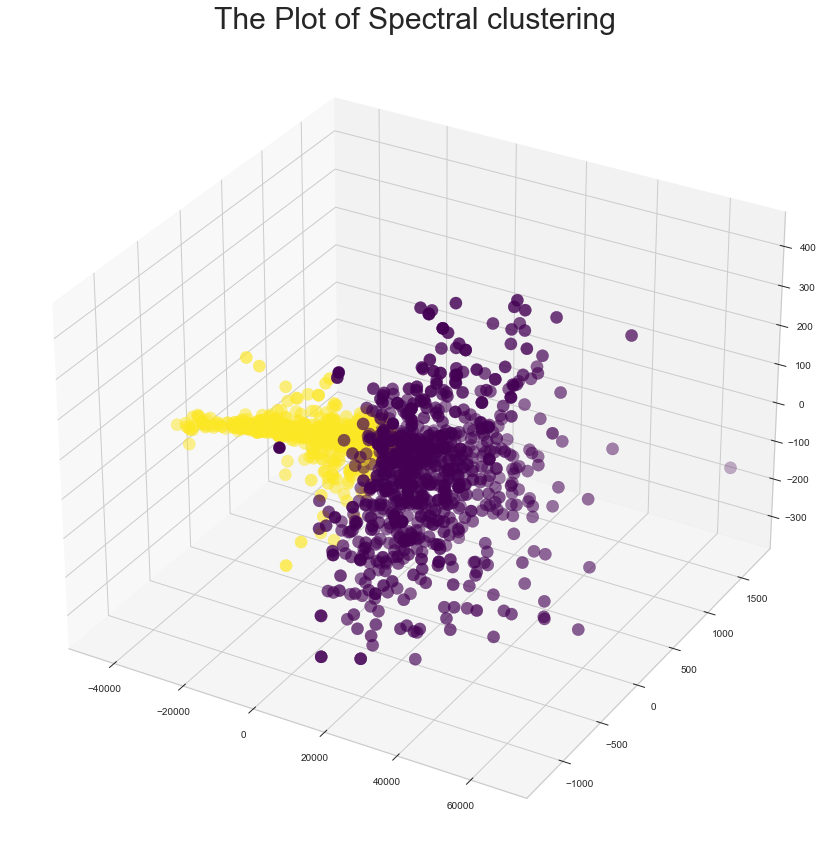

In [ ]:
# plotting the clusters in Dataset
#3D projection
fig=plt.figure(figsize=(20,15))
plot=plt.subplot(111,projection='3d',label="bla")
plot.scatter(x,y,z,s=150,c=pre_spe,marker='o',cmap='viridis')
plot.set_title("The Plot of Spectral clustering",fontsize=30)
plt.show()

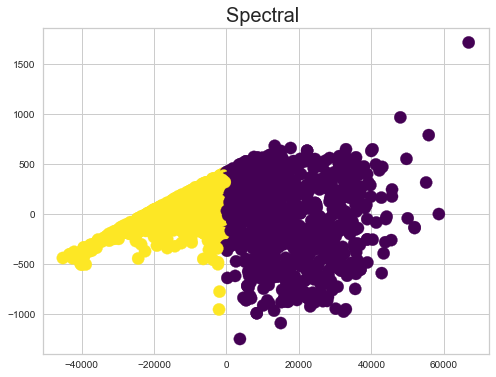

In [ ]:
#2D projection
fig =plt.figure(figsize=(8,6))
plt.title("Spectral ",fontsize=20)
plt.scatter(x,y, c=pre_spe, s=150, cmap='viridis')

In [ ]:
#evaluation metrics
score = silhouette_score(x_pca, spectral.labels_, metric='euclidean')
print('Silhouetter Score for Spectral Clustering: %.3f' % score)

Silhouetter Score for Spectral Clustering: 0.587


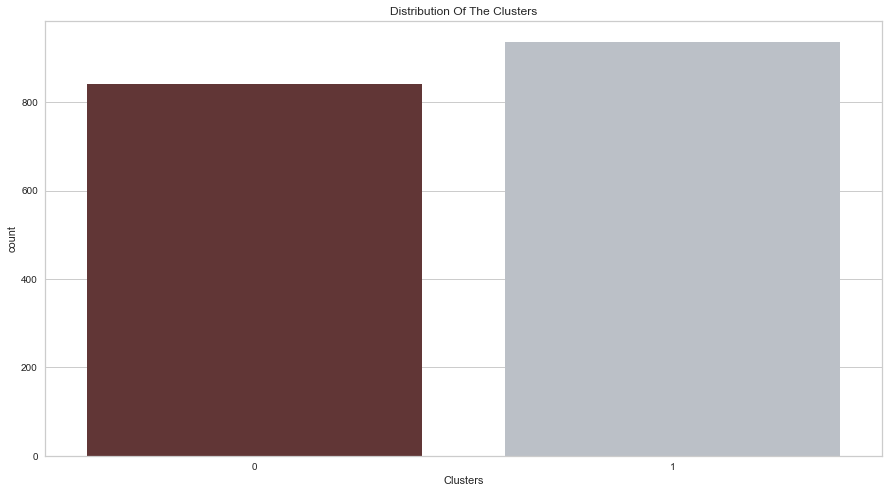

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

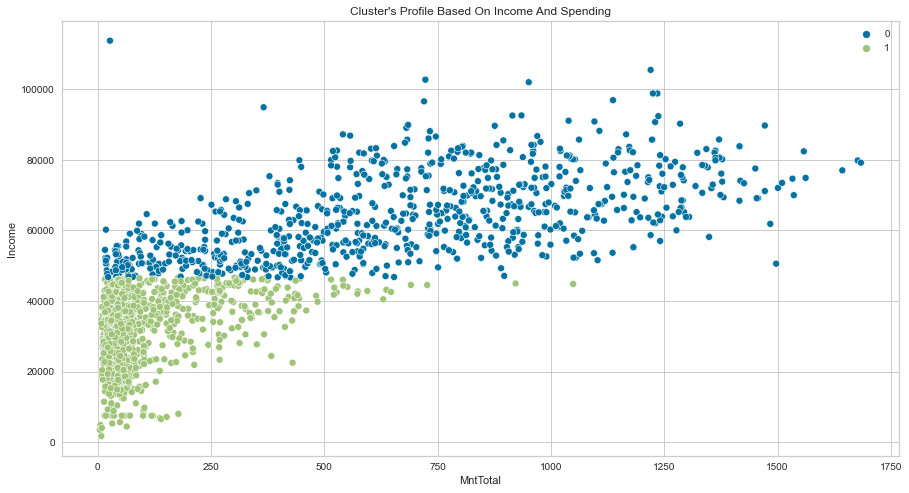

In [ ]:
pl = sns.scatterplot(data = df,x=df["MntTotal"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

# Centroid-based Clustering

## 1-Kmeans Clustering Model

-Kmeans is a centroid-based algorithm that assigns unlabeled datasets into a predetermined number of clusters.

-It is the simplest implementation of clustering and is suitable for small datasets. Each cluster has a centroid and each data point in the cluster must be closer to this cluster's centroid than any other centroid.
-This algorithm is iterative until there is no change in the centroid location. To determine the number of clusters at the beginning, there are two methods called the  elbow method and the silhouette method.
sums the squared distances between each point and centroid, then find the average distance. Otherwise, the silhouette method depends on calculating the mean intra-clustering and the mean nearest-cluster distance for each data point.

## Parameters
n_clusters : The number of clusters estimated

i : different values for K (number of clusters)

x_pca : the data set after applying PCA

## Steps:

1-Find the number of clusters either by elbow or silhouette method.

2-Initialize the location for each centroid.

3-Calculate distances between each point and initialized centroid.
4-Assign clusters according to the minimum distances.
5-Recreate centroids for each cluster by calculating the mean of all points in one cluster.
6-Repeat the steps until there is no update in the centroid location and each point is closer to its cluster centroid than any other centroids.

## Advantages:

1-Easy to implement
2-Can be scaled to large datasets
3-Can be easily adapted with new examples
4-Ensure convergence
## Disadvantages:

1-Need the number of clusters to be calculated manualy
2-Depends on initial values
3-Clusters may include outliers

## Determining the number of clusters using the silhouette method

The Silhouette score is used to evaluate the quality of clusters generated using clustering methods such as K-Means. It measures how well samples are grouped with other samples that are comparable to each other. It depends on two measures. First, the distance between each data point in a cluster and its nearest neighbor is also known as the mean nearest distance. Second measure is the mean intra-cluster which is the distance between points in same cluster.

In [ ]:
from sklearn.cluster import KMeans
#definig array includes scores for each K
silhouetteScore=[]
#apply Kmeans for each number of clusters from 2 to 10
for i in range(2,10):
    kmeanss = KMeans(i)
    #fit the model
    kmeanss.fit(x_pca)
    #predict the clusters
    y_kmeanss = kmeanss.predict(x_pca)
    #assigning the cluster feature to the data in the PCA
    x_pca["Clusters"]=y_kmeanss
    #assigning the clusters feature to the orignal dataframe.
    df["Clusters"]=y_kmeanss
    #calculate the silhouette score
    score = silhouette_score(x_pca, kmeanss.labels_, metric='euclidean')
    #add each score to the array
    silhouetteScore.append(score)
    #add each score to the array
    print("At k = ", i , " Silhouette Score: ",score)

At k =  2  Silhouette Score:  0.5918198390176661
At k =  3  Silhouette Score:  0.541714916510088
At k =  4  Silhouette Score:  0.5372932320784404
At k =  5  Silhouette Score:  0.5283982428574582
At k =  6  Silhouette Score:  0.5225905074844144
At k =  7  Silhouette Score:  0.5178456254941105
At k =  8  Silhouette Score:  0.5192372003976092
At k =  9  Silhouette Score:  0.5147090578261185


Text(0, 0.5, 'score')

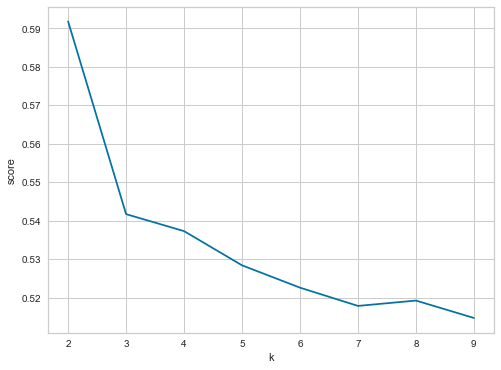

In [ ]:
import matplotlib.pyplot as plt
#plot the score vs number of clusters
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouetteScore)
ax.set_xlabel('k')
ax.set_ylabel('score')

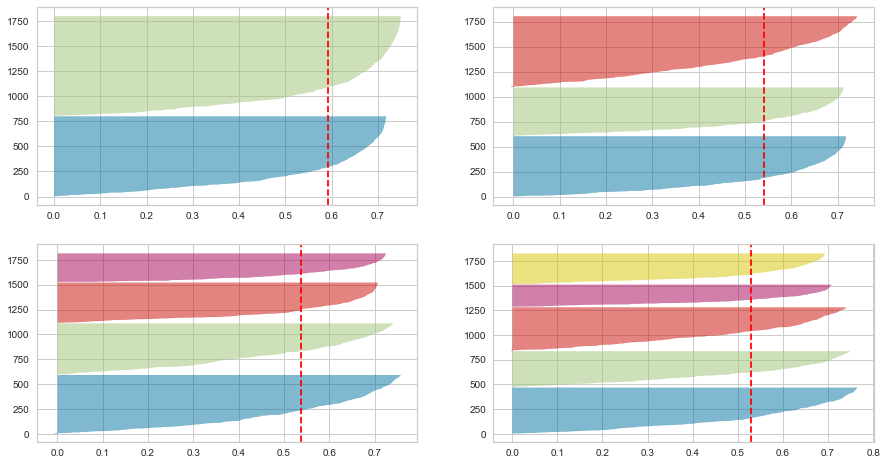

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax= plt.subplots(2, 2, figsize=(15,8))
# Instantiate the clustering model and visualizer
for i in range(2,6):
    kmeans = KMeans(n_clusters=i)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick', ax=ax[q-1][mod])
# Fit the data to the visualizer
    visualizer.fit(x_pca)

## Applying Kmeans clustering with K=2

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2,random_state=42)
# fit model and predict clusters
pre_kmeans=kmeans.fit_predict(x_pca)
#Assigning the cluster feature to the Data In The Reduced Dimension
x_pca["Clusters"]=pre_kmeans
#Assigning the Clusters feature to the orignal dataframe.
df["Clusters"]=pre_kmeans


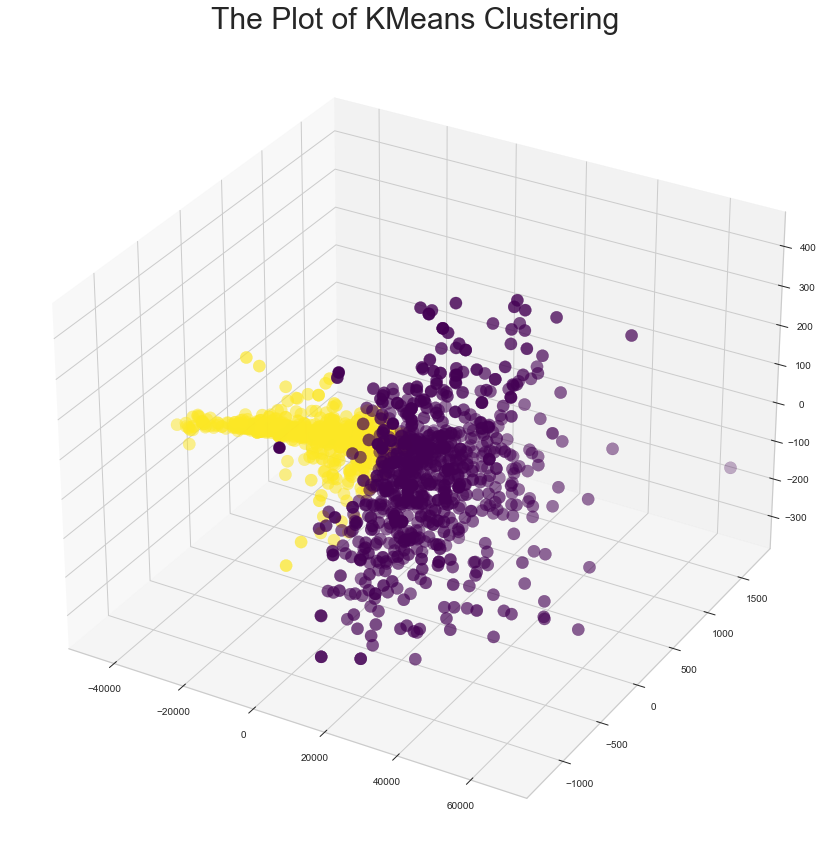

In [ ]:
from matplotlib import colors
# plotting the clusters in Dataset
#3D projection
fig=plt.figure(figsize=(20,15))
plot=plt.subplot(111,projection='3d',label="bla")
plot.set_title("The Plot of KMeans Clustering",fontsize=30)
plot.scatter(x,y,z,s=150,c=pre_kmeans,marker='o', cmap='viridis',zorder=10)
plt.show()

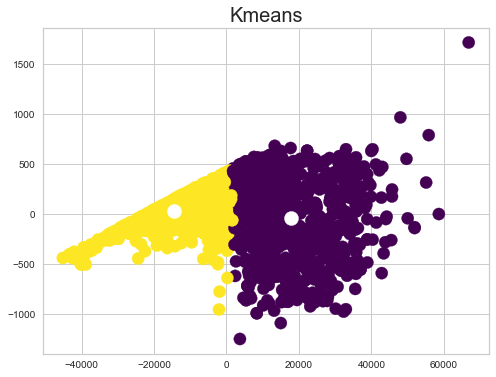

In [ ]:
#2D projection
fig =plt.figure(figsize=(8,6))
centers = kmeans.cluster_centers_
plt.title("Kmeans",fontsize=20)
plt.scatter(x,y, c=pre_kmeans, s=150, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='white', s=200);

In [ ]:
#evaluation metrics
score = silhouette_score(x_pca, kmeans.labels_, metric='euclidean')
print('Silhouetter Score for Kmeans Clustering Model : %.3f' % score)



Silhouetter Score for Kmeans Clustering Model : 0.592


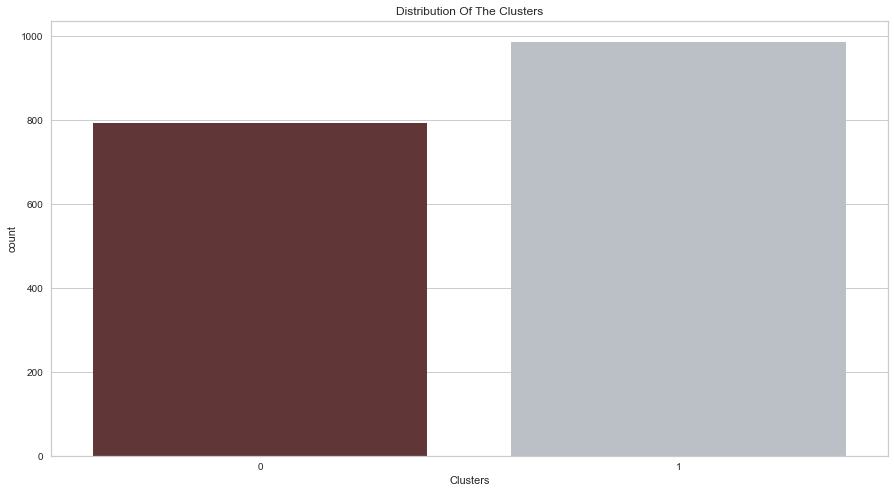

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=df["Clusters"], palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

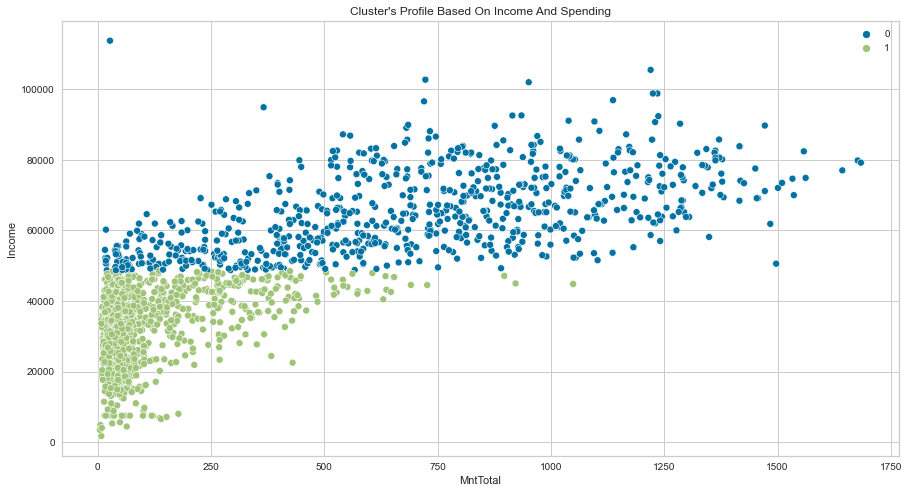

In [ ]:
pl = sns.scatterplot(data = df,x=df["MntTotal"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## 2-Mean Shift Clustering Model

The mean shift or mode-seeking algorithm is a nonparametric and simple algorithm. Unlike the Kmeans algorithm, it doesn't require the number of clusters. Otherwise, it assigns data points to clusters by shifting them into the peaks or the maximum density region. It is used in the field of computer vision and image processing. It works by initializing the kernel by determining bandwidth, then calculating the new centroid. The new centroid is calculated by subtracting the current value of the centroid from the mean of all data points in the kernel. This distance from previous and current centroids is called the mean shift vector. The algorithm will stop when there is no change in the value of the mode.

## Steps:

1-Initialize the kernel with estimated bandwidth.

2-Compute the new centroid by subtracting the current value of the centroid from the mean of all data points in the kernel.

3-Update the location of the new kernel based on the new centroid location.

4-Repeat the steps until shifted to the higher density region and no change in centroids location.

## Advantages:

1-Doesn't depend on the assumption.

2-Only need bandwidth to determine the number of clusters.

3-No problem with outliers.

4-Can deal with non-convex shapes.

## Disadvantages:

1-Doesn't work well in high-dimension datasets.

2-It depends on the Kernel size.

## parameters:
-bin_seeding:Setting this option to True will speed up the algorithm because fewer seeds will be initialized. The default value is False. Ignored if seeds argument is not None.

quantile:Should be between [0, 1] 0.5 means that the median of all pairwise distances is used , default=0.3

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth
#estimate the value of bandwidth (segma in gaussian distribution)
bw = estimate_bandwidth(x_pca,quantile=0.3, n_samples=None)
#apply the mean shift algorithm to the estimated bw
ms = MeanShift(bandwidth=bw, bin_seeding=True)
#fit the model
ms.fit(x_pca)
#assign labels for each point
labels = ms.labels_
#compute the centroid
centerss = ms.cluster_centers_
unique_labels = labels

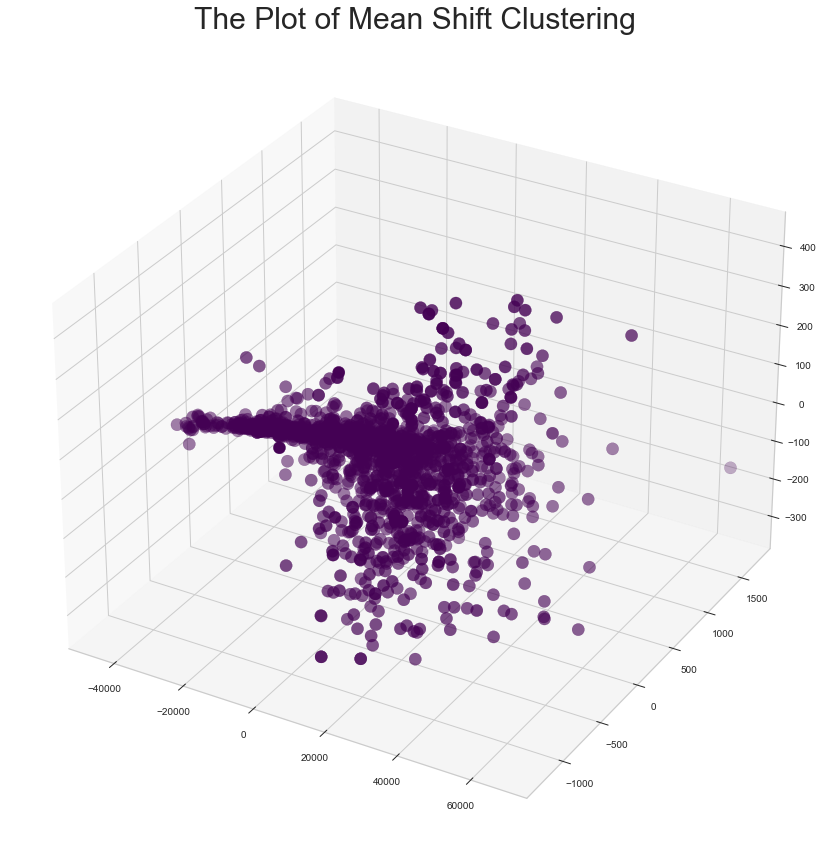

In [ ]:
import matplotlib.pyplot as plt
# plotting the clusters in Dataset
#3D projection
fig=plt.figure(figsize=(20,15))
plot = fig.add_subplot(111,projection='3d',label="bla")
plot.set_title("The Plot of Mean Shift Clustering",fontsize=30)
plot.scatter(x,y,z, s=150,c=unique_labels , marker ='o',cmap='viridis')
plt.show()

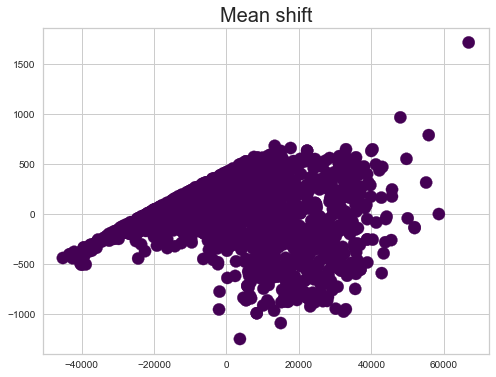

In [ ]:
#2D projection
fig =plt.figure(figsize=(8,6))
plt.title("Mean shift",fontsize=20)
plt.scatter(x,y, c=unique_labels, s=150,cmap='viridis')


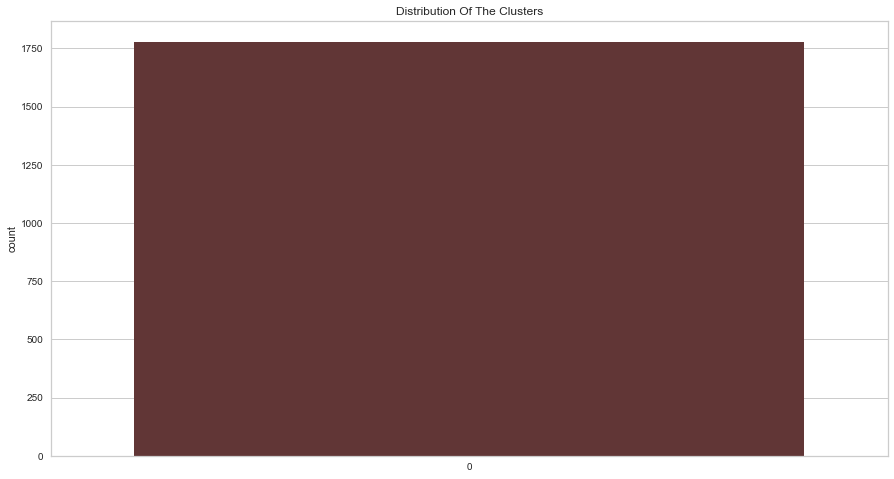

In [ ]:
#Plotting countplot of clusters
pal = ["#682F2F","#B9C0C9"]
pl = sns.countplot(x=unique_labels , palette= pal)
pl.set_title("Distribution Of The Clusters")
plt.show()

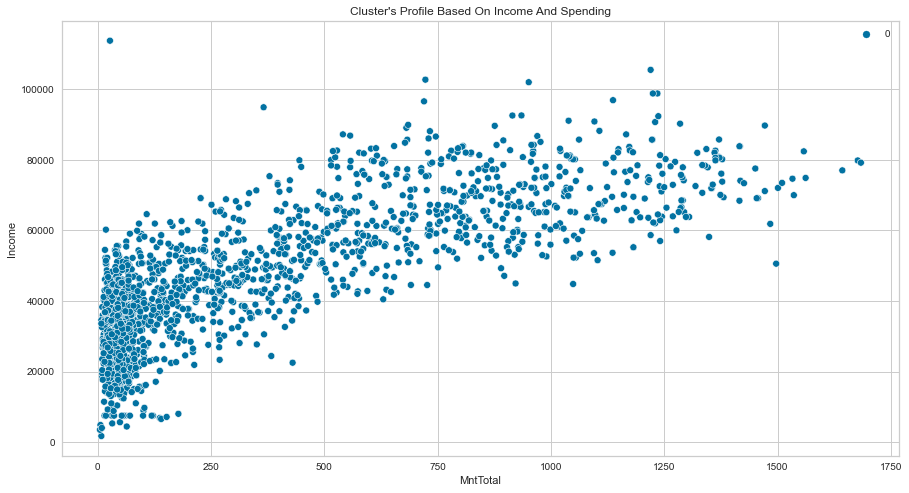

In [ ]:
pl = sns.scatterplot(data = df,x=df["MntTotal"], y=df["Income"],hue=unique_labels )
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

## 1-DBSCAN

In [ ]:
#Initiating PCA to reduce dimentions aka features to 2
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(df.values)

x_pca = pd.DataFrame(pca.transform(df.values), columns=(["col1","col2"]))
x_pca.describe()

col1          col2
count  1.779000e+03  1.779000e+03
mean   2.320004e-12  3.118560e-14
std    1.932067e+04  3.064727e+02
min   -4.515192e+04 -1.249552e+03
25%   -1.461779e+04 -1.580041e+02
50%   -1.699751e+03  3.700729e+01
75%    1.436234e+04  1.972801e+02
max    6.683120e+04  1.714501e+03

<AxesSubplot:xlabel='col1'>

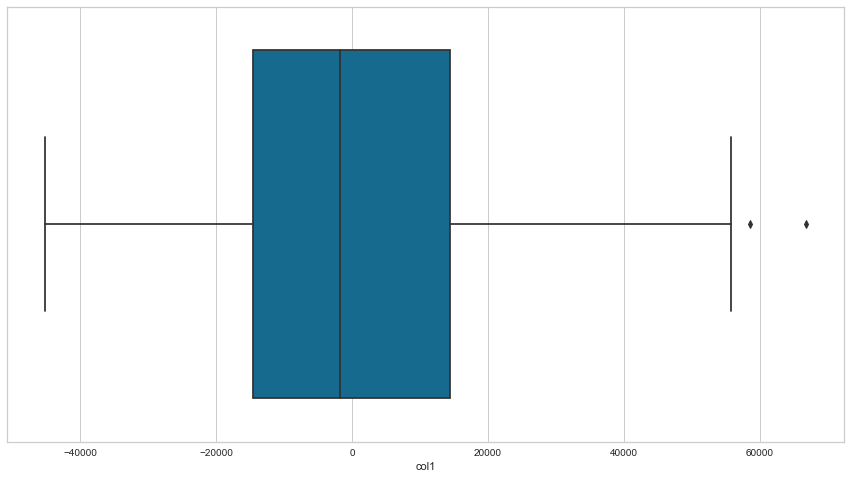

In [ ]:
sns.boxplot(x=x_pca["col1"])

<AxesSubplot:xlabel='col2'>

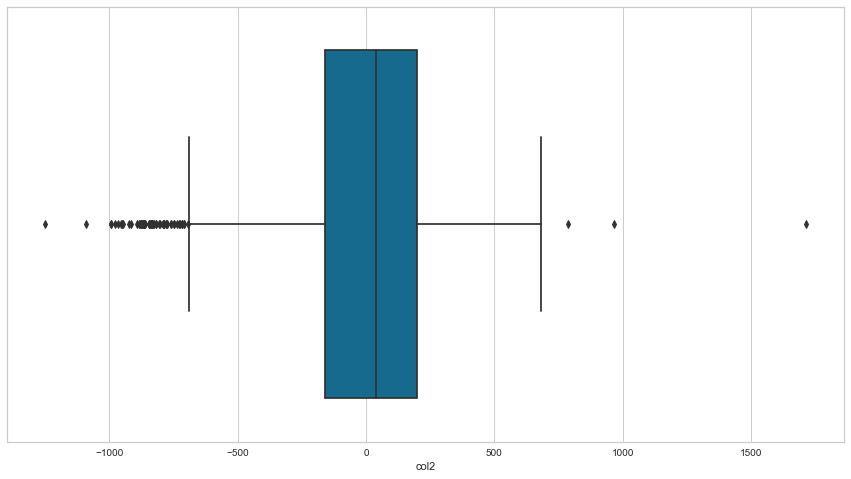

In [ ]:
sns.boxplot(x=x_pca["col2"])

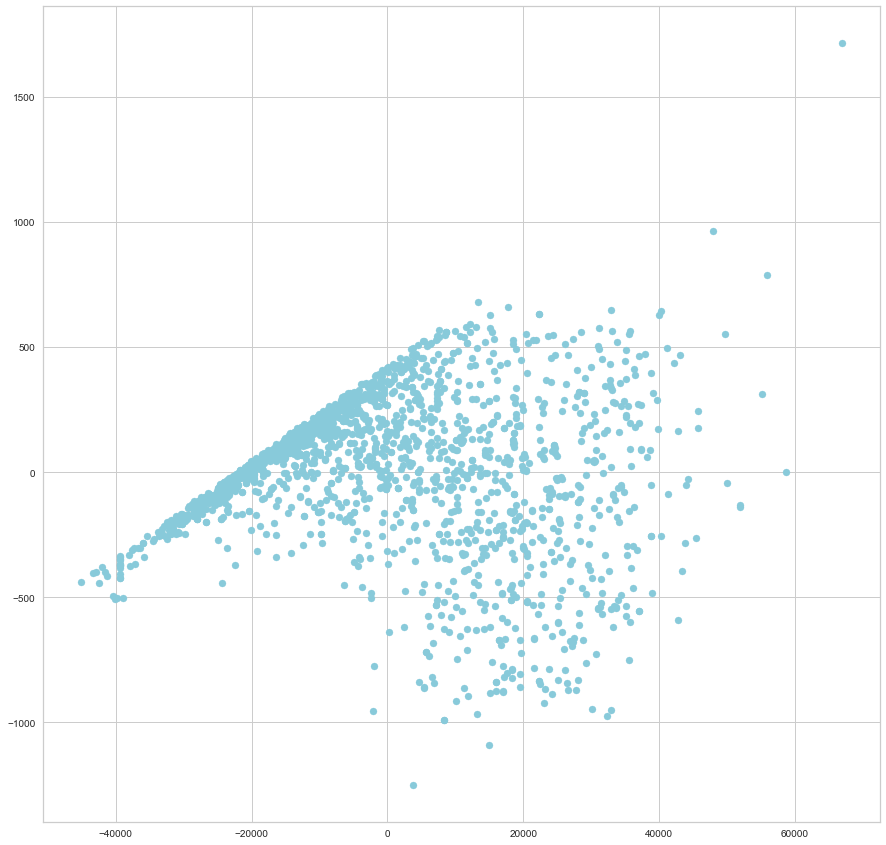

In [ ]:
#A 3D Projection Of Data In The Reduced Dimension
x=x_pca['col1']
y=x_pca['col2']

fig=plt.figure(figsize=(15,15))
xy=fig.add_subplot()
xy.scatter(x,y ,c='c' , marker="o")
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
neighb = NearestNeighbors(n_neighbors=3) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(df) # fitting the data to the object
distances,indices=nbrs.kneighbors(df) # finding the nearest neighbours

In [ ]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances


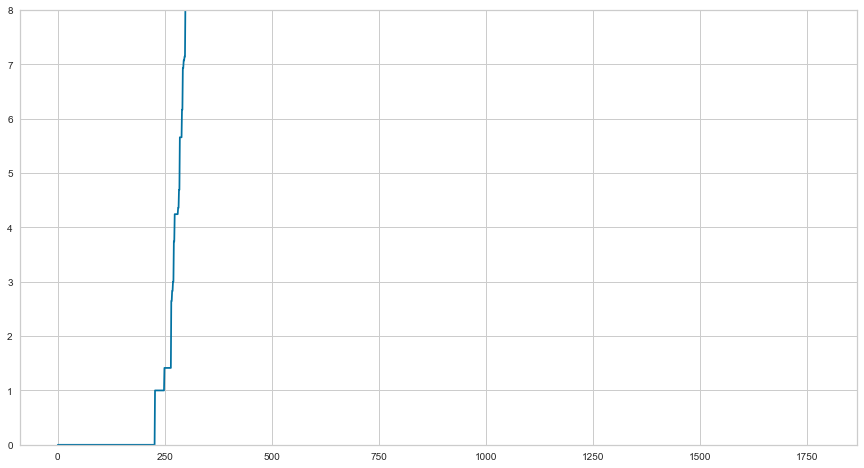

In [ ]:
plt.plot(distances) # plotting the distances
plt.ylim(0,8)
plt.show() # showing the plot

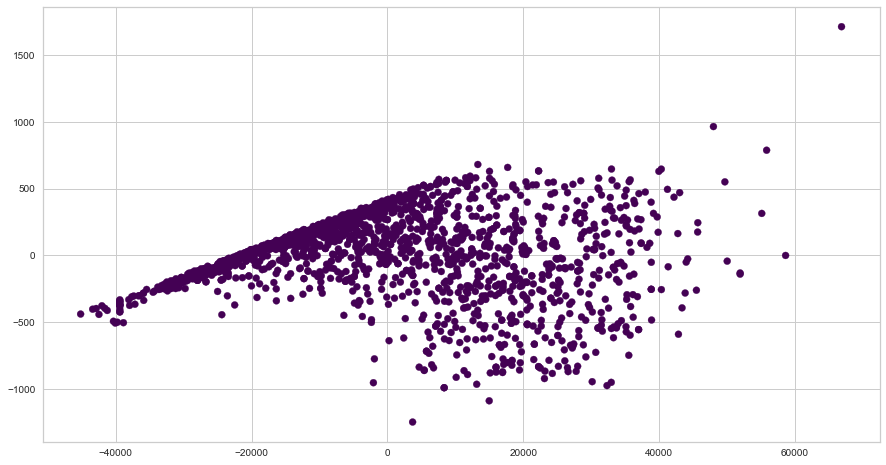

In [ ]:
from sklearn.cluster import DBSCAN
DB_SCAN = DBSCAN(eps = 5, min_samples =100).fit(df)
labels = DB_SCAN.labels_
plt.scatter(x,y, c = labels,cmap='viridis') # plotting the clusters

plt.show() # showing the plot